In [1]:
import matplotlib.pyplot as plt      
from mpl_toolkits import mplot3d
import os
import sys
import glob
import time
import shutil
import gym
from gym import error, spaces, utils
import numpy as np
import math

In [2]:
import gym_fish

In [3]:
from gym_fish.envs.lib import pyflare as fl

In [4]:
Experiment_name = 'reach target with buoyancy control'
Experiment_note = """
"""

In [5]:
gpuId = 0
control_dt=0.2
theta = np.array([90,90])
phi = np.array([45,45])
radius=2.0
max_time = 10
action_max= 10
done_dist = 0.15
dist_distri_param =np.array([0,0.0])
wc = 0.0*np.array([1.0,0.5])
wp = 1.0*np.array([0.0,1.0])
wa = 0.1

couple_mode =  fl.COUPLE_MODE.TWO_WAY

In [6]:
env=gym.make('fish-basic-v0',
             env_json='../assets/env_file/env_basic.json',
                  gpuId=gpuId,
                        couple_mode=couple_mode,
                         control_dt=control_dt,
                         theta = theta,
             phi = phi,
                        radius=radius,
             action_max=action_max,
                        max_time=max_time,
                        wp=wp,wc=wc,wa=wa,
                       done_dist=done_dist,dist_distri_param=dist_distri_param
                   )
env_test=gym.make('fish-basic-v0',
             env_json='../assets/env_file/env_basic.json',
                  gpuId=gpuId,
                        couple_mode=couple_mode,
                         control_dt=control_dt,
                         theta = theta,
             phi = phi,
                        radius=radius,
             action_max=action_max,
                        max_time=max_time,
                        wp=wp,wc=wc,wa=wa,
                       done_dist=done_dist,dist_distri_param=dist_distri_param
                   )

visulization data save folder /home/liuwj/codes/pytorch_fish/scripts/gym-fish/gym_fish/envs/data/vis_data/


/home/liuwj/test_env/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


visulization data save folder /home/liuwj/codes/pytorch_fish/scripts/gym-fish/gym_fish/envs/data/vis_data/


In [7]:
print(os.getcwd())
os.chdir(os.getcwd()+"/../")
print(os.getcwd())

/home/liuwj/codes/pytorch_fish/scripts
/home/liuwj/codes/pytorch_fish


### Import Settings

In [8]:
cwd = os.getcwd()+"/"
print(cwd)

/home/liuwj/codes/pytorch_fish/


In [9]:
def plot_infos(infos,title,reward_fig_name):
    dd = {k:[] for k in infos[0].keys()}
    for info in infos:
        for k in info.keys():
            dd[k].append(info[k])
    plt.figure()
    for k in dd.keys():
        if k=='action_penality':
            plt.plot(np.arange(0,len(dd[k])),[kkk  for kkk in dd[k]],label=k)
        else:
            plt.plot(np.arange(0,len(dd[k])),dd[k],label=k)
    plt.legend()
    plt.title(title)
    plt.savefig(reward_fig_name)
    plt.show()

### Output Settings

In [10]:
store_folder_name = time.strftime('%Y-%m-%d/',time.localtime(time.time()))+Experiment_name+'_'+time.strftime('%Y-%m-%d %H:%M/',time.localtime(time.time()))
imgs_folder_name = 'imgs/'
network_folder_name = 'networks/'
store_folder = cwd+'output_data/'+store_folder_name
imgs_folder = store_folder+imgs_folder_name
network_folder = store_folder+network_folder_name

if not os.path.exists(store_folder):
    os.makedirs(store_folder)
if not os.path.exists(imgs_folder):
    os.makedirs(imgs_folder)
if not os.path.exists(network_folder):
    os.makedirs(network_folder)

### RL_TRAINING Setup

In [11]:
from stable_baselines3 import SAC

## RL Begin

In [13]:
algo = 'SAC'
algofoler=algo+'/'
if not os.path.exists(network_folder+algofoler):
    os.makedirs(network_folder+algofoler)
if not os.path.exists(network_folder+algofoler+'imgs/'):
    os.makedirs(network_folder+algofoler+'imgs/')
if not os.path.exists(network_folder+algofoler+'imgs/trajs/'):
    os.makedirs(network_folder+algofoler+'imgs/trajs/')
if not os.path.exists(network_folder+algofoler+'imgs/rewards/'):
    os.makedirs(network_folder+algofoler+'imgs/rewards/')
if not os.path.exists(network_folder+algofoler+'models/'):
    os.makedirs(network_folder+algofoler+'models/')

tb_folder =  network_folder+algofoler
model_folder = network_folder+algofoler+'models/'
result_img_folder = network_folder+algofoler+'imgs/'

In [14]:
def evaluate_env(env_test,model,title,traj_fig_name,reward_fig_name,save=False):
    obs = env_test.reset()
    dones = False
    infos = []
    reward = 0
    env_test.save = save
    while not dones:
        action, _states = model.predict(obs, deterministic=True)
        obs, r, dones,info=env_test.step(action)
        reward=reward+r
        infos.append(info)
    plot_infos(infos,title=title,reward_fig_name=reward_fig_name)
    env_test.plot3d(title=title,fig_name = traj_fig_name)
    return reward

### RL Train

In [15]:
!./clean_visdata.sh

rm: 无法删除'./data/vis_data/Objects/*': 没有那个文件或目录
rm: 无法删除'./data/vis_data/Trajectory/*': 没有那个文件或目录
rm: 无法删除'./data/vis_data/Fluid/*': 没有那个文件或目录


In [16]:
timesteps = int(1e6)
step = int(1e3)
length =int(timesteps/step) 
print(timesteps,step,length)
last_best_reward = -1e5
cur_steps = 0

1000000 1000 1000


In [17]:
model = SAC("MlpPolicy", env,
             tensorboard_log=network_folder+algofoler, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15       |
|    ep_rew_mean     | 3.04     |
| time/              |          |
|    episodes        | 1        |
|    fps             | 0        |
|    time_elapsed    | 18       |
|    total timesteps | 15       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13       |
|    ep_rew_mean     | -2.64    |
| time/              |          |
|    episodes        | 2        |
|    fps             | 0        |
|    time_elapsed    | 30       |
|    total timesteps | 26       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11       |
|    ep_rew_mean     | -4.43    |
| time/              |          |
|    episodes        | 3        |
|    fps             | 0        |
|    time_elapsed    | 39       |
|    total timesteps | 33       |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.5     |
|    ep_rew_mean     | 0.54     |
| time/              |          |
|    episodes        | 19       |
|    fps             | 0        |
|    time_elapsed    | 252      |
|    total timesteps | 219      |
| train/             |          |
|    actor_loss      | -7.04    |
|    critic_loss     | 1.14     |
|    ent_coef        | 0.965    |
|    ent_coef_loss   | -0.296   |
|    learning_rate   | 0.0003   |
|    n_updates       | 118      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.5     |
|    ep_rew_mean     | 0.378    |
| time/              |          |
|    episodes        | 20       |
|    fps             | 0        |
|    time_elapsed    | 265      |
|    total timesteps | 230      |
| train/             |          |
|    actor_loss      | -7.16    |
|    critic_loss     | 0.982    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.1     |
|    ep_rew_mean     | -0.246   |
| time/              |          |
|    episodes        | 34       |
|    fps             | 0        |
|    time_elapsed    | 502      |
|    total timesteps | 444      |
| train/             |          |
|    actor_loss      | -8.55    |
|    critic_loss     | 1.29     |
|    ent_coef        | 0.903    |
|    ent_coef_loss   | -0.857   |
|    learning_rate   | 0.0003   |
|    n_updates       | 343      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | -0.444   |
| time/              |          |
|    episodes        | 35       |
|    fps             | 0        |
|    time_elapsed    | 511      |
|    total timesteps | 451      |
| train/             |          |
|    actor_loss      | -8.48    |
|    critic_loss     | 1.09     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | -0.546   |
| time/              |          |
|    episodes        | 49       |
|    fps             | 0        |
|    time_elapsed    | 709      |
|    total timesteps | 622      |
| train/             |          |
|    actor_loss      | -9.99    |
|    critic_loss     | 1.17     |
|    ent_coef        | 0.856    |
|    ent_coef_loss   | -1.3     |
|    learning_rate   | 0.0003   |
|    n_updates       | 521      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.6     |
|    ep_rew_mean     | -0.568   |
| time/              |          |
|    episodes        | 50       |
|    fps             | 0        |
|    time_elapsed    | 721      |
|    total timesteps | 632      |
| train/             |          |
|    actor_loss      | -9.98    |
|    critic_loss     | 1.19     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.5     |
|    ep_rew_mean     | 0.0783   |
| time/              |          |
|    episodes        | 64       |
|    fps             | 0        |
|    time_elapsed    | 917      |
|    total timesteps | 801      |
| train/             |          |
|    actor_loss      | -11      |
|    critic_loss     | 1.35     |
|    ent_coef        | 0.811    |
|    ent_coef_loss   | -1.73    |
|    learning_rate   | 0.0003   |
|    n_updates       | 700      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.4     |
|    ep_rew_mean     | -0.0689  |
| time/              |          |
|    episodes        | 65       |
|    fps             | 0        |
|    time_elapsed    | 927      |
|    total timesteps | 809      |
| train/             |          |
|    actor_loss      | -11.2    |
|    critic_loss     | 1.58     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.2     |
|    ep_rew_mean     | 0.318    |
| time/              |          |
|    episodes        | 79       |
|    fps             | 0        |
|    time_elapsed    | 1112     |
|    total timesteps | 966      |
| train/             |          |
|    actor_loss      | -11.7    |
|    critic_loss     | 1.41     |
|    ent_coef        | 0.773    |
|    ent_coef_loss   | -2.13    |
|    learning_rate   | 0.0003   |
|    n_updates       | 865      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.5     |
|    ep_rew_mean     | 0.306    |
| time/              |          |
|    episodes        | 80       |
|    fps             | 0        |
|    time_elapsed    | 1145     |
|    total timesteps | 999      |
| train/             |          |
|    actor_loss      | -12.4    |
|    critic_loss     | 1.09     |
|    ent_coef 

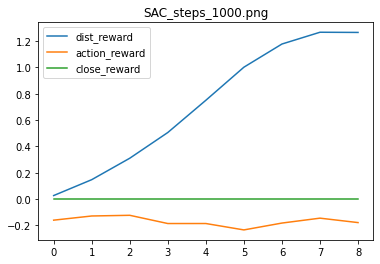

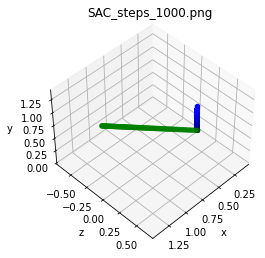

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.4     |
|    ep_rew_mean     | 0.244    |
| time/              |          |
|    episodes        | 81       |
|    fps             | 109      |
|    time_elapsed    | 9        |
|    total timesteps | 1007     |
| train/             |          |
|    actor_loss      | -12.6    |
|    critic_loss     | 1.41     |
|    ent_coef        | 0.763    |
|    ent_coef_loss   | -2.21    |
|    learning_rate   | 0.0003   |
|    n_updates       | 906      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.4     |
|    ep_rew_mean     | 0.334    |
| time/              |          |
|    episodes        | 82       |
|    fps             | 45       |
|    time_elapsed    | 22       |
|    total timesteps | 1018     |
| train/             |          |
|    actor_loss      | -12      |
|    critic_loss     | 1.39     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.6     |
|    ep_rew_mean     | 0.791    |
| time/              |          |
|    episodes        | 96       |
|    fps             | 5        |
|    time_elapsed    | 241      |
|    total timesteps | 1211     |
| train/             |          |
|    actor_loss      | -12.9    |
|    critic_loss     | 1.73     |
|    ent_coef        | 0.719    |
|    ent_coef_loss   | -2.67    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1110     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | 0.904    |
| time/              |          |
|    episodes        | 97       |
|    fps             | 4        |
|    time_elapsed    | 263      |
|    total timesteps | 1232     |
| train/             |          |
|    actor_loss      | -13.5    |
|    critic_loss     | 1.88     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 1.75     |
| time/              |          |
|    episodes        | 111      |
|    fps             | 2        |
|    time_elapsed    | 472      |
|    total timesteps | 1413     |
| train/             |          |
|    actor_loss      | -14.6    |
|    critic_loss     | 1.58     |
|    ent_coef        | 0.678    |
|    ent_coef_loss   | -3.08    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1312     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.9     |
|    ep_rew_mean     | 1.86     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 2        |
|    time_elapsed    | 482      |
|    total timesteps | 1421     |
| train/             |          |
|    actor_loss      | -14.9    |
|    critic_loss     | 1.59     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.3     |
|    ep_rew_mean     | 2.22     |
| time/              |          |
|    episodes        | 126      |
|    fps             | 2        |
|    time_elapsed    | 643      |
|    total timesteps | 1553     |
| train/             |          |
|    actor_loss      | -14      |
|    critic_loss     | 1.8      |
|    ent_coef        | 0.651    |
|    ent_coef_loss   | -3.29    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1452     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.2     |
|    ep_rew_mean     | 2.27     |
| time/              |          |
|    episodes        | 127      |
|    fps             | 2        |
|    time_elapsed    | 653      |
|    total timesteps | 1561     |
| train/             |          |
|    actor_loss      | -14.8    |
|    critic_loss     | 1.47     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.3     |
|    ep_rew_mean     | 3.66     |
| time/              |          |
|    episodes        | 141      |
|    fps             | 2        |
|    time_elapsed    | 858      |
|    total timesteps | 1739     |
| train/             |          |
|    actor_loss      | -15.8    |
|    critic_loss     | 2.25     |
|    ent_coef        | 0.617    |
|    ent_coef_loss   | -3.65    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1638     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.3     |
|    ep_rew_mean     | 3.65     |
| time/              |          |
|    episodes        | 142      |
|    fps             | 2        |
|    time_elapsed    | 868      |
|    total timesteps | 1747     |
| train/             |          |
|    actor_loss      | -15.8    |
|    critic_loss     | 2.09     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.2     |
|    ep_rew_mean     | 3.54     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 1        |
|    time_elapsed    | 1078     |
|    total timesteps | 1930     |
| train/             |          |
|    actor_loss      | -15.6    |
|    critic_loss     | 2.41     |
|    ent_coef        | 0.585    |
|    ent_coef_loss   | -3.91    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1829     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.4     |
|    ep_rew_mean     | 3.54     |
| time/              |          |
|    episodes        | 157      |
|    fps             | 1        |
|    time_elapsed    | 1105     |
|    total timesteps | 1956     |
| train/             |          |
|    actor_loss      | -16.2    |
|    critic_loss     | 1.81     |
|    ent_coef 

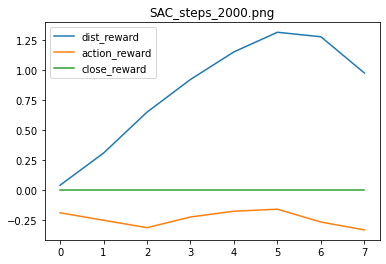

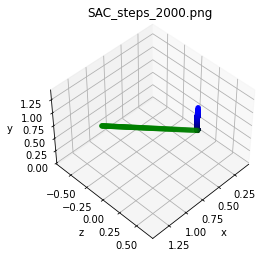

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.5     |
|    ep_rew_mean     | 3.67     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 242      |
|    time_elapsed    | 8        |
|    total timesteps | 2006     |
| train/             |          |
|    actor_loss      | -14.7    |
|    critic_loss     | 2.68     |
|    ent_coef        | 0.572    |
|    ent_coef_loss   | -4.02    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1905     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.5     |
|    ep_rew_mean     | 3.64     |
| time/              |          |
|    episodes        | 161      |
|    fps             | 94       |
|    time_elapsed    | 21       |
|    total timesteps | 2017     |
| train/             |          |
|    actor_loss      | -15.8    |
|    critic_loss     | 2.24     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.3     |
|    ep_rew_mean     | 3.69     |
| time/              |          |
|    episodes        | 175      |
|    fps             | 7        |
|    time_elapsed    | 289      |
|    total timesteps | 2262     |
| train/             |          |
|    actor_loss      | -14.7    |
|    critic_loss     | 3.14     |
|    ent_coef        | 0.533    |
|    ent_coef_loss   | -4.44    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2161     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.5     |
|    ep_rew_mean     | 3.56     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 7        |
|    time_elapsed    | 316      |
|    total timesteps | 2288     |
| train/             |          |
|    actor_loss      | -15.3    |
|    critic_loss     | 2.09     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.8     |
|    ep_rew_mean     | 3.55     |
| time/              |          |
|    episodes        | 190      |
|    fps             | 4        |
|    time_elapsed    | 558      |
|    total timesteps | 2505     |
| train/             |          |
|    actor_loss      | -15.3    |
|    critic_loss     | 3.07     |
|    ent_coef        | 0.498    |
|    ent_coef_loss   | -5       |
|    learning_rate   | 0.0003   |
|    n_updates       | 2404     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.8     |
|    ep_rew_mean     | 3.52     |
| time/              |          |
|    episodes        | 191      |
|    fps             | 4        |
|    time_elapsed    | 568      |
|    total timesteps | 2513     |
| train/             |          |
|    actor_loss      | -14.9    |
|    critic_loss     | 2.31     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.5     |
|    ep_rew_mean     | 2.19     |
| time/              |          |
|    episodes        | 205      |
|    fps             | 3        |
|    time_elapsed    | 853      |
|    total timesteps | 2776     |
| train/             |          |
|    actor_loss      | -13.8    |
|    critic_loss     | 2.8      |
|    ent_coef        | 0.461    |
|    ent_coef_loss   | -5.43    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2675     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 14.6     |
|    ep_rew_mean     | 2.22     |
| time/              |          |
|    episodes        | 206      |
|    fps             | 3        |
|    time_elapsed    | 881      |
|    total timesteps | 2803     |
| train/             |          |
|    actor_loss      | -14.8    |
|    critic_loss     | 2.16     |
|    ent_coef 

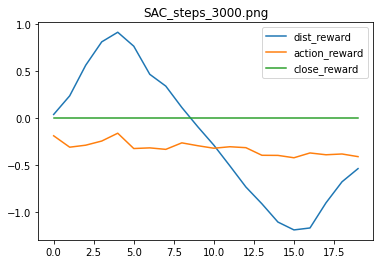

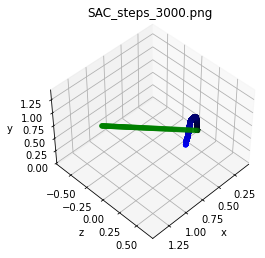

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.7     |
|    ep_rew_mean     | 1.77     |
| time/              |          |
|    episodes        | 216      |
|    fps             | 103      |
|    time_elapsed    | 29       |
|    total timesteps | 3028     |
| train/             |          |
|    actor_loss      | -14      |
|    critic_loss     | 3.23     |
|    ent_coef        | 0.429    |
|    ent_coef_loss   | -5.91    |
|    learning_rate   | 0.0003   |
|    n_updates       | 2927     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.8     |
|    ep_rew_mean     | 1.67     |
| time/              |          |
|    episodes        | 217      |
|    fps             | 63       |
|    time_elapsed    | 47       |
|    total timesteps | 3045     |
| train/             |          |
|    actor_loss      | -14.1    |
|    critic_loss     | 3.13     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.4     |
|    ep_rew_mean     | 0.933    |
| time/              |          |
|    episodes        | 231      |
|    fps             | 9        |
|    time_elapsed    | 364      |
|    total timesteps | 3339     |
| train/             |          |
|    actor_loss      | -14.6    |
|    critic_loss     | 3.49     |
|    ent_coef        | 0.392    |
|    ent_coef_loss   | -6.59    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3238     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.5     |
|    ep_rew_mean     | 0.888    |
| time/              |          |
|    episodes        | 232      |
|    fps             | 8        |
|    time_elapsed    | 392      |
|    total timesteps | 3366     |
| train/             |          |
|    actor_loss      | -13.5    |
|    critic_loss     | 3.2      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.9     |
|    ep_rew_mean     | 0.255    |
| time/              |          |
|    episodes        | 246      |
|    fps             | 5        |
|    time_elapsed    | 726      |
|    total timesteps | 3679     |
| train/             |          |
|    actor_loss      | -13.3    |
|    critic_loss     | 2.2      |
|    ent_coef        | 0.356    |
|    ent_coef_loss   | -7.14    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3578     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 0.458    |
| time/              |          |
|    episodes        | 247      |
|    fps             | 4        |
|    time_elapsed    | 758      |
|    total timesteps | 3710     |
| train/             |          |
|    actor_loss      | -13      |
|    critic_loss     | 3.34     |
|    ent_coef 

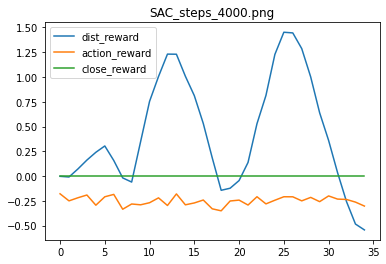

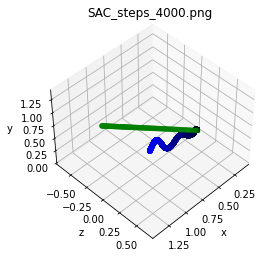

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.3     |
|    ep_rew_mean     | 1.03     |
| time/              |          |
|    episodes        | 259      |
|    fps             | 128      |
|    time_elapsed    | 31       |
|    total timesteps | 4030     |
| train/             |          |
|    actor_loss      | -13.4    |
|    critic_loss     | 2.33     |
|    ent_coef        | 0.322    |
|    ent_coef_loss   | -7.59    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3929     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.4     |
|    ep_rew_mean     | 1.08     |
| time/              |          |
|    episodes        | 260      |
|    fps             | 79       |
|    time_elapsed    | 50       |
|    total timesteps | 4048     |
| train/             |          |
|    actor_loss      | -13.2    |
|    critic_loss     | 2.57     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | 1.88     |
| time/              |          |
|    episodes        | 274      |
|    fps             | 9        |
|    time_elapsed    | 445      |
|    total timesteps | 4424     |
| train/             |          |
|    actor_loss      | -12.8    |
|    critic_loss     | 2.32     |
|    ent_coef        | 0.288    |
|    ent_coef_loss   | -8.12    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4323     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | 1.98     |
| time/              |          |
|    episodes        | 275      |
|    fps             | 9        |
|    time_elapsed    | 472      |
|    total timesteps | 4450     |
| train/             |          |
|    actor_loss      | -13      |
|    critic_loss     | 1.94     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | 2.73     |
| time/              |          |
|    episodes        | 289      |
|    fps             | 5        |
|    time_elapsed    | 858      |
|    total timesteps | 4818     |
| train/             |          |
|    actor_loss      | -13.1    |
|    critic_loss     | 2.25     |
|    ent_coef        | 0.258    |
|    ent_coef_loss   | -8.53    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4717     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | 2.78     |
| time/              |          |
|    episodes        | 290      |
|    fps             | 5        |
|    time_elapsed    | 892      |
|    total timesteps | 4851     |
| train/             |          |
|    actor_loss      | -13.1    |
|    critic_loss     | 2.07     |
|    ent_coef 

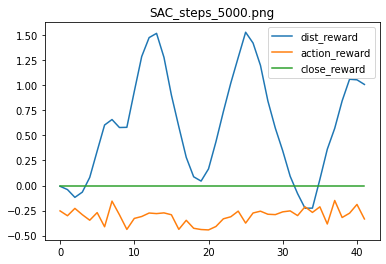

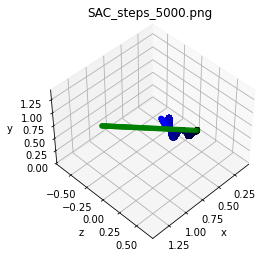

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | 3.17     |
| time/              |          |
|    episodes        | 295      |
|    fps             | 449      |
|    time_elapsed    | 11       |
|    total timesteps | 5009     |
| train/             |          |
|    actor_loss      | -13      |
|    critic_loss     | 1.86     |
|    ent_coef        | 0.244    |
|    ent_coef_loss   | -8.75    |
|    learning_rate   | 0.0003   |
|    n_updates       | 4908     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.5     |
|    ep_rew_mean     | 3.25     |
| time/              |          |
|    episodes        | 296      |
|    fps             | 124      |
|    time_elapsed    | 40       |
|    total timesteps | 5037     |
| train/             |          |
|    actor_loss      | -12.1    |
|    critic_loss     | 1.72     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | 4.55     |
| time/              |          |
|    episodes        | 310      |
|    fps             | 13       |
|    time_elapsed    | 405      |
|    total timesteps | 5383     |
| train/             |          |
|    actor_loss      | -12.1    |
|    critic_loss     | 1.89     |
|    ent_coef        | 0.22     |
|    ent_coef_loss   | -9.24    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5282     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 4.74     |
| time/              |          |
|    episodes        | 311      |
|    fps             | 12       |
|    time_elapsed    | 442      |
|    total timesteps | 5419     |
| train/             |          |
|    actor_loss      | -11.7    |
|    critic_loss     | 1.95     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 6.16     |
| time/              |          |
|    episodes        | 325      |
|    fps             | 6        |
|    time_elapsed    | 887      |
|    total timesteps | 5847     |
| train/             |          |
|    actor_loss      | -11.3    |
|    critic_loss     | 2.74     |
|    ent_coef        | 0.193    |
|    ent_coef_loss   | -9.48    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5746     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.5     |
|    ep_rew_mean     | 6.42     |
| time/              |          |
|    episodes        | 326      |
|    fps             | 6        |
|    time_elapsed    | 927      |
|    total timesteps | 5886     |
| train/             |          |
|    actor_loss      | -11.8    |
|    critic_loss     | 1.5      |
|    ent_coef 

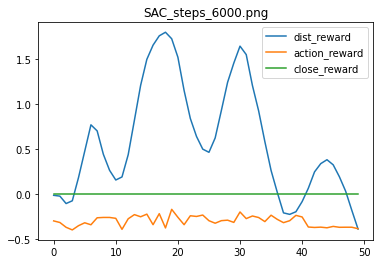

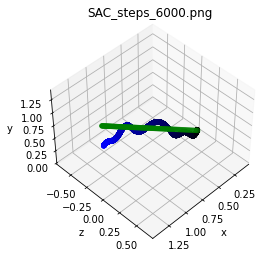

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.7     |
|    ep_rew_mean     | 7.1      |
| time/              |          |
|    episodes        | 331      |
|    fps             | 531      |
|    time_elapsed    | 11       |
|    total timesteps | 6009     |
| train/             |          |
|    actor_loss      | -12      |
|    critic_loss     | 1.48     |
|    ent_coef        | 0.185    |
|    ent_coef_loss   | -9.27    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5908     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.8     |
|    ep_rew_mean     | 7.25     |
| time/              |          |
|    episodes        | 332      |
|    fps             | 116      |
|    time_elapsed    | 52       |
|    total timesteps | 6049     |
| train/             |          |
|    actor_loss      | -11.1    |
|    critic_loss     | 1.77     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 8.56     |
| time/              |          |
|    episodes        | 346      |
|    fps             | 14       |
|    time_elapsed    | 428      |
|    total timesteps | 6407     |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 1.48     |
|    ent_coef        | 0.166    |
|    ent_coef_loss   | -10.3    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6306     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 8.57     |
| time/              |          |
|    episodes        | 347      |
|    fps             | 13       |
|    time_elapsed    | 461      |
|    total timesteps | 6439     |
| train/             |          |
|    actor_loss      | -11.1    |
|    critic_loss     | 1.34     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.1     |
|    ep_rew_mean     | 10.2     |
| time/              |          |
|    episodes        | 361      |
|    fps             | 7        |
|    time_elapsed    | 922      |
|    total timesteps | 6885     |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 1.42     |
|    ent_coef        | 0.145    |
|    ent_coef_loss   | -10.4    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6784     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.1     |
|    ep_rew_mean     | 10.3     |
| time/              |          |
|    episodes        | 362      |
|    fps             | 7        |
|    time_elapsed    | 954      |
|    total timesteps | 6916     |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 1.17     |
|    ent_coef 

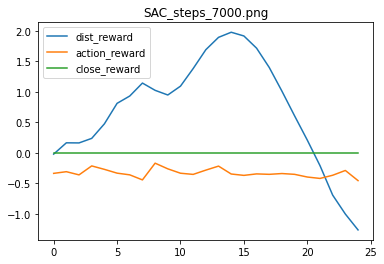

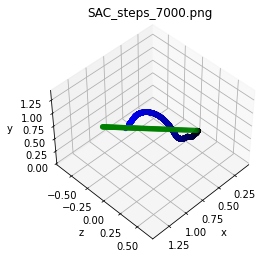

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 10.5     |
| time/              |          |
|    episodes        | 365      |
|    fps             | 1551     |
|    time_elapsed    | 4        |
|    total timesteps | 7002     |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 1.31     |
|    ent_coef        | 0.141    |
|    ent_coef_loss   | -9.94    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6901     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 10.6     |
| time/              |          |
|    episodes        | 366      |
|    fps             | 279      |
|    time_elapsed    | 25       |
|    total timesteps | 7021     |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 1.27     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28       |
|    ep_rew_mean     | 11.6     |
| time/              |          |
|    episodes        | 380      |
|    fps             | 18       |
|    time_elapsed    | 400      |
|    total timesteps | 7376     |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 1.24     |
|    ent_coef        | 0.127    |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7275     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 11.7     |
| time/              |          |
|    episodes        | 381      |
|    fps             | 17       |
|    time_elapsed    | 415      |
|    total timesteps | 7389     |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 1.1      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 12.7     |
| time/              |          |
|    episodes        | 395      |
|    fps             | 9        |
|    time_elapsed    | 798      |
|    total timesteps | 7754     |
| train/             |          |
|    actor_loss      | -9.82    |
|    critic_loss     | 1.14     |
|    ent_coef        | 0.115    |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7653     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 12.9     |
| time/              |          |
|    episodes        | 396      |
|    fps             | 9        |
|    time_elapsed    | 820      |
|    total timesteps | 7774     |
| train/             |          |
|    actor_loss      | -11      |
|    critic_loss     | 0.896    |
|    ent_coef 

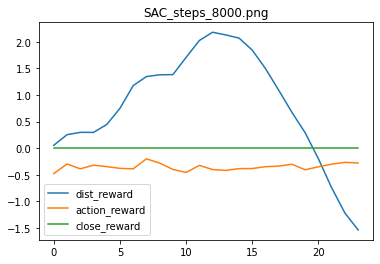

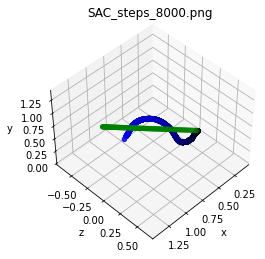

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 406      |
|    fps             | 162      |
|    time_elapsed    | 49       |
|    total timesteps | 8049     |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 1        |
|    ent_coef        | 0.107    |
|    ent_coef_loss   | -9.82    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7948     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 13.3     |
| time/              |          |
|    episodes        | 407      |
|    fps             | 107      |
|    time_elapsed    | 75       |
|    total timesteps | 8073     |
| train/             |          |
|    actor_loss      | -9.47    |
|    critic_loss     | 1.17     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 421      |
|    fps             | 17       |
|    time_elapsed    | 498      |
|    total timesteps | 8478     |
| train/             |          |
|    actor_loss      | -9.95    |
|    critic_loss     | 1.12     |
|    ent_coef        | 0.0954   |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8377     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 422      |
|    fps             | 16       |
|    time_elapsed    | 529      |
|    total timesteps | 8508     |
| train/             |          |
|    actor_loss      | -9.41    |
|    critic_loss     | 1.09     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 436      |
|    fps             | 9        |
|    time_elapsed    | 902      |
|    total timesteps | 8861     |
| train/             |          |
|    actor_loss      | -9.18    |
|    critic_loss     | 0.953    |
|    ent_coef        | 0.0862   |
|    ent_coef_loss   | -10      |
|    learning_rate   | 0.0003   |
|    n_updates       | 8760     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 437      |
|    fps             | 9        |
|    time_elapsed    | 928      |
|    total timesteps | 8885     |
| train/             |          |
|    actor_loss      | -9.13    |
|    critic_loss     | 1.23     |
|    ent_coef 

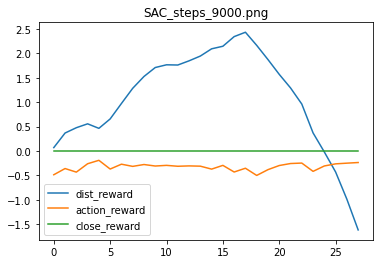

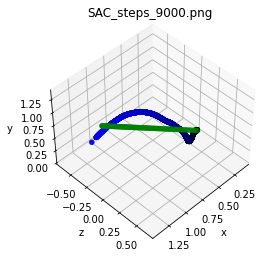

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.6     |
|    ep_rew_mean     | 14       |
| time/              |          |
|    episodes        | 444      |
|    fps             | 500      |
|    time_elapsed    | 18       |
|    total timesteps | 9016     |
| train/             |          |
|    actor_loss      | -9.35    |
|    critic_loss     | 1.14     |
|    ent_coef        | 0.0828   |
|    ent_coef_loss   | -10.5    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8915     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.7     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 445      |
|    fps             | 151      |
|    time_elapsed    | 59       |
|    total timesteps | 9057     |
| train/             |          |
|    actor_loss      | -9.59    |
|    critic_loss     | 0.961    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 459      |
|    fps             | 20       |
|    time_elapsed    | 464      |
|    total timesteps | 9441     |
| train/             |          |
|    actor_loss      | -9.55    |
|    critic_loss     | 0.846    |
|    ent_coef        | 0.0741   |
|    ent_coef_loss   | -9.51    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9340     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 13.6     |
| time/              |          |
|    episodes        | 460      |
|    fps             | 19       |
|    time_elapsed    | 482      |
|    total timesteps | 9457     |
| train/             |          |
|    actor_loss      | -8.78    |
|    critic_loss     | 0.879    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 474      |
|    fps             | 11       |
|    time_elapsed    | 874      |
|    total timesteps | 9828     |
| train/             |          |
|    actor_loss      | -8.87    |
|    critic_loss     | 0.841    |
|    ent_coef        | 0.067    |
|    ent_coef_loss   | -9.17    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9727     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 475      |
|    fps             | 10       |
|    time_elapsed    | 917      |
|    total timesteps | 9870     |
| train/             |          |
|    actor_loss      | -7.83    |
|    critic_loss     | 0.868    |
|    ent_coef 

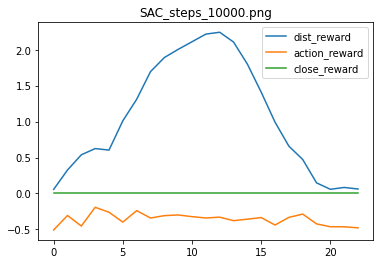

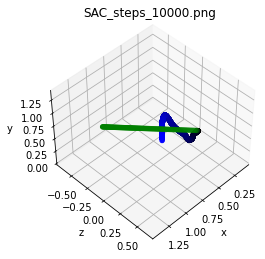

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 13.8     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 586      |
|    time_elapsed    | 17       |
|    total timesteps | 10015    |
| train/             |          |
|    actor_loss      | -8.65    |
|    critic_loss     | 0.74     |
|    ent_coef        | 0.0639   |
|    ent_coef_loss   | -9.58    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9914     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.5     |
|    ep_rew_mean     | 13.9     |
| time/              |          |
|    episodes        | 481      |
|    fps             | 225      |
|    time_elapsed    | 44       |
|    total timesteps | 10041    |
| train/             |          |
|    actor_loss      | -8.6     |
|    critic_loss     | 0.796    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 14.4     |
| time/              |          |
|    episodes        | 495      |
|    fps             | 26       |
|    time_elapsed    | 390      |
|    total timesteps | 10363    |
| train/             |          |
|    actor_loss      | -8.48    |
|    critic_loss     | 1        |
|    ent_coef        | 0.0586   |
|    ent_coef_loss   | -9.43    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10262    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 14.5     |
| time/              |          |
|    episodes        | 496      |
|    fps             | 25       |
|    time_elapsed    | 413      |
|    total timesteps | 10384    |
| train/             |          |
|    actor_loss      | -8.79    |
|    critic_loss     | 0.971    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.9     |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 510      |
|    fps             | 13       |
|    time_elapsed    | 797      |
|    total timesteps | 10746    |
| train/             |          |
|    actor_loss      | -8.86    |
|    critic_loss     | 0.752    |
|    ent_coef        | 0.0534   |
|    ent_coef_loss   | -9.63    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10645    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 15.4     |
| time/              |          |
|    episodes        | 511      |
|    fps             | 12       |
|    time_elapsed    | 832      |
|    total timesteps | 10780    |
| train/             |          |
|    actor_loss      | -8.81    |
|    critic_loss     | 1.08     |
|    ent_coef 

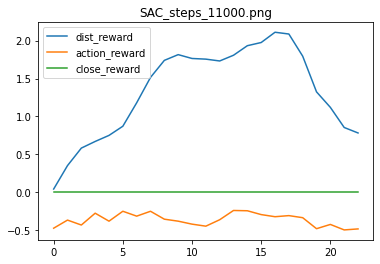

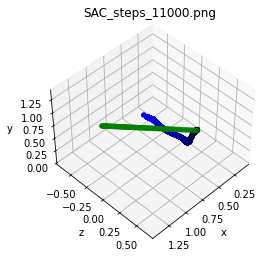

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 15.8     |
| time/              |          |
|    episodes        | 520      |
|    fps             | 908      |
|    time_elapsed    | 12       |
|    total timesteps | 11010    |
| train/             |          |
|    actor_loss      | -9.41    |
|    critic_loss     | 1.08     |
|    ent_coef        | 0.0501   |
|    ent_coef_loss   | -7.05    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10909    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 15.8     |
| time/              |          |
|    episodes        | 521      |
|    fps             | 293      |
|    time_elapsed    | 37       |
|    total timesteps | 11034    |
| train/             |          |
|    actor_loss      | -8.31    |
|    critic_loss     | 1.5      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 17.1     |
| time/              |          |
|    episodes        | 535      |
|    fps             | 28       |
|    time_elapsed    | 395      |
|    total timesteps | 11371    |
| train/             |          |
|    actor_loss      | -9.13    |
|    critic_loss     | 0.863    |
|    ent_coef        | 0.046    |
|    ent_coef_loss   | -7.37    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11270    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | 17.2     |
| time/              |          |
|    episodes        | 536      |
|    fps             | 27       |
|    time_elapsed    | 418      |
|    total timesteps | 11393    |
| train/             |          |
|    actor_loss      | -8.88    |
|    critic_loss     | 0.6      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 18       |
| time/              |          |
|    episodes        | 550      |
|    fps             | 14       |
|    time_elapsed    | 819      |
|    total timesteps | 11774    |
| train/             |          |
|    actor_loss      | -9.02    |
|    critic_loss     | 0.761    |
|    ent_coef        | 0.0419   |
|    ent_coef_loss   | -8.27    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11673    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 18       |
| time/              |          |
|    episodes        | 551      |
|    fps             | 13       |
|    time_elapsed    | 847      |
|    total timesteps | 11801    |
| train/             |          |
|    actor_loss      | -9.21    |
|    critic_loss     | 0.648    |
|    ent_coef 

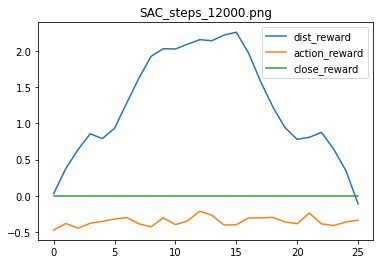

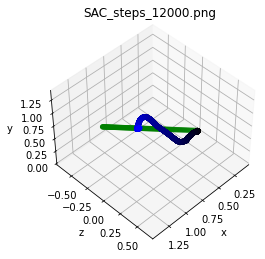

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 18       |
| time/              |          |
|    episodes        | 558      |
|    fps             | 670      |
|    time_elapsed    | 17       |
|    total timesteps | 12016    |
| train/             |          |
|    actor_loss      | -7.95    |
|    critic_loss     | 0.796    |
|    ent_coef        | 0.0397   |
|    ent_coef_loss   | -5.37    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11915    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 18.1     |
| time/              |          |
|    episodes        | 559      |
|    fps             | 245      |
|    time_elapsed    | 49       |
|    total timesteps | 12046    |
| train/             |          |
|    actor_loss      | -8.88    |
|    critic_loss     | 1.46     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 18.5     |
| time/              |          |
|    episodes        | 573      |
|    fps             | 27       |
|    time_elapsed    | 449      |
|    total timesteps | 12427    |
| train/             |          |
|    actor_loss      | -8.51    |
|    critic_loss     | 0.843    |
|    ent_coef        | 0.0362   |
|    ent_coef_loss   | -6.02    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12326    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.3     |
|    ep_rew_mean     | 18.6     |
| time/              |          |
|    episodes        | 574      |
|    fps             | 25       |
|    time_elapsed    | 480      |
|    total timesteps | 12457    |
| train/             |          |
|    actor_loss      | -7.76    |
|    critic_loss     | 0.7      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 19.1     |
| time/              |          |
|    episodes        | 588      |
|    fps             | 13       |
|    time_elapsed    | 932      |
|    total timesteps | 12894    |
| train/             |          |
|    actor_loss      | -9.17    |
|    critic_loss     | 0.654    |
|    ent_coef        | 0.0328   |
|    ent_coef_loss   | -5.85    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12793    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 19.1     |
| time/              |          |
|    episodes        | 589      |
|    fps             | 13       |
|    time_elapsed    | 969      |
|    total timesteps | 12930    |
| train/             |          |
|    actor_loss      | -9.04    |
|    critic_loss     | 0.732    |
|    ent_coef 

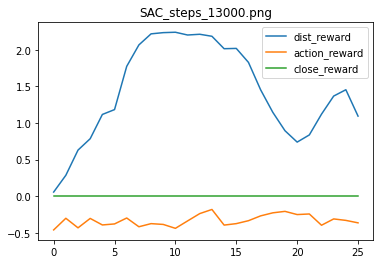

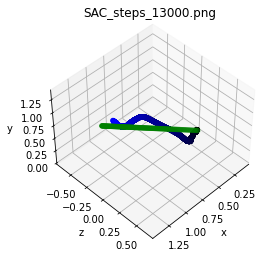

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 18.9     |
| time/              |          |
|    episodes        | 592      |
|    fps             | 392      |
|    time_elapsed    | 33       |
|    total timesteps | 13032    |
| train/             |          |
|    actor_loss      | -8.33    |
|    critic_loss     | 0.757    |
|    ent_coef        | 0.0319   |
|    ent_coef_loss   | -5.03    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12931    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 18.9     |
| time/              |          |
|    episodes        | 593      |
|    fps             | 178      |
|    time_elapsed    | 73       |
|    total timesteps | 13071    |
| train/             |          |
|    actor_loss      | -8.78    |
|    critic_loss     | 0.76     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.5     |
|    ep_rew_mean     | 19       |
| time/              |          |
|    episodes        | 607      |
|    fps             | 25       |
|    time_elapsed    | 539      |
|    total timesteps | 13519    |
| train/             |          |
|    actor_loss      | -9.33    |
|    critic_loss     | 0.616    |
|    ent_coef        | 0.0291   |
|    ent_coef_loss   | -3.38    |
|    learning_rate   | 0.0003   |
|    n_updates       | 13418    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.6     |
|    ep_rew_mean     | 19       |
| time/              |          |
|    episodes        | 608      |
|    fps             | 23       |
|    time_elapsed    | 568      |
|    total timesteps | 13547    |
| train/             |          |
|    actor_loss      | -8.79    |
|    critic_loss     | 0.711    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.2     |
|    ep_rew_mean     | 18.7     |
| time/              |          |
|    episodes        | 622      |
|    fps             | 13       |
|    time_elapsed    | 1019     |
|    total timesteps | 13979    |
| train/             |          |
|    actor_loss      | -8.84    |
|    critic_loss     | 0.82     |
|    ent_coef        | 0.0269   |
|    ent_coef_loss   | -3.59    |
|    learning_rate   | 0.0003   |
|    n_updates       | 13878    |
---------------------------------


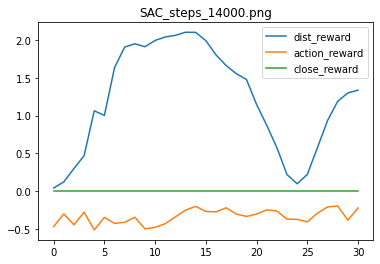

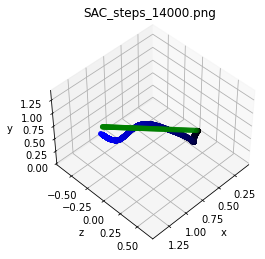

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 18.7     |
| time/              |          |
|    episodes        | 623      |
|    fps             | 669      |
|    time_elapsed    | 20       |
|    total timesteps | 14019    |
| train/             |          |
|    actor_loss      | -9.9     |
|    critic_loss     | 0.942    |
|    ent_coef        | 0.0268   |
|    ent_coef_loss   | -2.04    |
|    learning_rate   | 0.0003   |
|    n_updates       | 13918    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.4     |
|    ep_rew_mean     | 18.9     |
| time/              |          |
|    episodes        | 624      |
|    fps             | 272      |
|    time_elapsed    | 51       |
|    total timesteps | 14048    |
| train/             |          |
|    actor_loss      | -8.85    |
|    critic_loss     | 0.661    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | 19.2     |
| time/              |          |
|    episodes        | 638      |
|    fps             | 30       |
|    time_elapsed    | 475      |
|    total timesteps | 14452    |
| train/             |          |
|    actor_loss      | -9.23    |
|    critic_loss     | 0.824    |
|    ent_coef        | 0.0252   |
|    ent_coef_loss   | -1.83    |
|    learning_rate   | 0.0003   |
|    n_updates       | 14351    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.1     |
|    ep_rew_mean     | 19.2     |
| time/              |          |
|    episodes        | 639      |
|    fps             | 28       |
|    time_elapsed    | 504      |
|    total timesteps | 14480    |
| train/             |          |
|    actor_loss      | -9.3     |
|    critic_loss     | 0.876    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | 19.3     |
| time/              |          |
|    episodes        | 653      |
|    fps             | 15       |
|    time_elapsed    | 947      |
|    total timesteps | 14904    |
| train/             |          |
|    actor_loss      | -9.52    |
|    critic_loss     | 0.728    |
|    ent_coef        | 0.0239   |
|    ent_coef_loss   | -1.36    |
|    learning_rate   | 0.0003   |
|    n_updates       | 14803    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | 19.3     |
| time/              |          |
|    episodes        | 654      |
|    fps             | 15       |
|    time_elapsed    | 973      |
|    total timesteps | 14928    |
| train/             |          |
|    actor_loss      | -9.32    |
|    critic_loss     | 0.744    |
|    ent_coef 

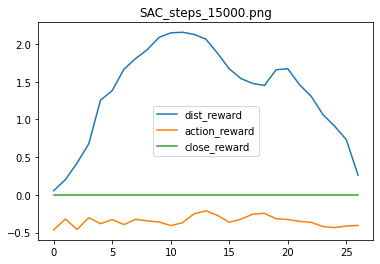

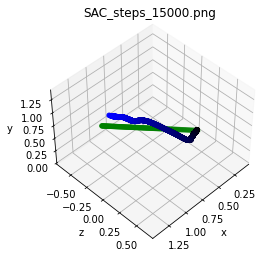

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.3     |
|    ep_rew_mean     | 19.5     |
| time/              |          |
|    episodes        | 657      |
|    fps             | 937      |
|    time_elapsed    | 16       |
|    total timesteps | 15014    |
| train/             |          |
|    actor_loss      | -8.69    |
|    critic_loss     | 1.03     |
|    ent_coef        | 0.0236   |
|    ent_coef_loss   | -0.353   |
|    learning_rate   | 0.0003   |
|    n_updates       | 14913    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.2     |
|    ep_rew_mean     | 19.6     |
| time/              |          |
|    episodes        | 658      |
|    fps             | 345      |
|    time_elapsed    | 43       |
|    total timesteps | 15040    |
| train/             |          |
|    actor_loss      | -9.83    |
|    critic_loss     | 0.535    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.5     |
|    ep_rew_mean     | 20.2     |
| time/              |          |
|    episodes        | 672      |
|    fps             | 31       |
|    time_elapsed    | 483      |
|    total timesteps | 15449    |
| train/             |          |
|    actor_loss      | -9.29    |
|    critic_loss     | 0.835    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | 0.183    |
|    learning_rate   | 0.0003   |
|    n_updates       | 15348    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.5     |
|    ep_rew_mean     | 20.3     |
| time/              |          |
|    episodes        | 673      |
|    fps             | 30       |
|    time_elapsed    | 514      |
|    total timesteps | 15478    |
| train/             |          |
|    actor_loss      | -8.86    |
|    critic_loss     | 0.811    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.9     |
|    ep_rew_mean     | 20.5     |
| time/              |          |
|    episodes        | 687      |
|    fps             | 17       |
|    time_elapsed    | 909      |
|    total timesteps | 15854    |
| train/             |          |
|    actor_loss      | -9.66    |
|    critic_loss     | 0.596    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | 0.164    |
|    learning_rate   | 0.0003   |
|    n_updates       | 15753    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.1     |
|    ep_rew_mean     | 20.3     |
| time/              |          |
|    episodes        | 688      |
|    fps             | 16       |
|    time_elapsed    | 961      |
|    total timesteps | 15905    |
| train/             |          |
|    actor_loss      | -9.25    |
|    critic_loss     | 0.759    |
|    ent_coef 

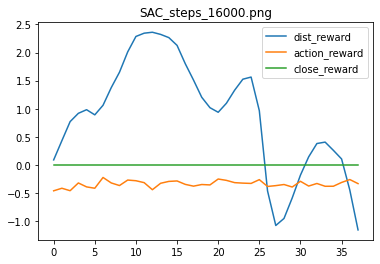

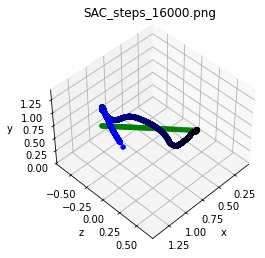

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.5     |
|    ep_rew_mean     | 20.6     |
| time/              |          |
|    episodes        | 693      |
|    fps             | 732      |
|    time_elapsed    | 21       |
|    total timesteps | 16020    |
| train/             |          |
|    actor_loss      | -9.57    |
|    critic_loss     | 0.721    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | -1.43    |
|    learning_rate   | 0.0003   |
|    n_updates       | 15919    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.4     |
|    ep_rew_mean     | 20.6     |
| time/              |          |
|    episodes        | 694      |
|    fps             | 308      |
|    time_elapsed    | 51       |
|    total timesteps | 16049    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.815    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 20.8     |
| time/              |          |
|    episodes        | 708      |
|    fps             | 33       |
|    time_elapsed    | 496      |
|    total timesteps | 16476    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.65     |
|    ent_coef        | 0.0229   |
|    ent_coef_loss   | -0.401   |
|    learning_rate   | 0.0003   |
|    n_updates       | 16375    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 20.8     |
| time/              |          |
|    episodes        | 709      |
|    fps             | 31       |
|    time_elapsed    | 527      |
|    total timesteps | 16506    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.663    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.5     |
|    ep_rew_mean     | 21.1     |
| time/              |          |
|    episodes        | 723      |
|    fps             | 18       |
|    time_elapsed    | 908      |
|    total timesteps | 16867    |
| train/             |          |
|    actor_loss      | -9.95    |
|    critic_loss     | 0.845    |
|    ent_coef        | 0.023    |
|    ent_coef_loss   | -0.0342  |
|    learning_rate   | 0.0003   |
|    n_updates       | 16766    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.5     |
|    ep_rew_mean     | 21.1     |
| time/              |          |
|    episodes        | 724      |
|    fps             | 18       |
|    time_elapsed    | 936      |
|    total timesteps | 16894    |
| train/             |          |
|    actor_loss      | -9.69    |
|    critic_loss     | 0.898    |
|    ent_coef 

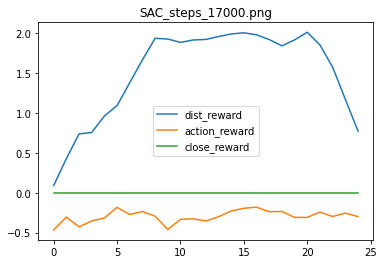

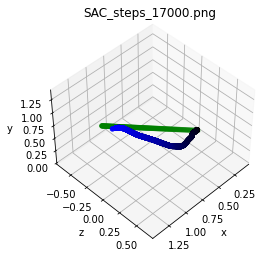

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.8     |
|    ep_rew_mean     | 21.3     |
| time/              |          |
|    episodes        | 728      |
|    fps             | 892      |
|    time_elapsed    | 19       |
|    total timesteps | 17017    |
| train/             |          |
|    actor_loss      | -9.75    |
|    critic_loss     | 1.13     |
|    ent_coef        | 0.0229   |
|    ent_coef_loss   | 1.55     |
|    learning_rate   | 0.0003   |
|    n_updates       | 16916    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.9     |
|    ep_rew_mean     | 21.3     |
| time/              |          |
|    episodes        | 729      |
|    fps             | 338      |
|    time_elapsed    | 50       |
|    total timesteps | 17047    |
| train/             |          |
|    actor_loss      | -9.04    |
|    critic_loss     | 0.811    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.2     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    episodes        | 743      |
|    fps             | 40       |
|    time_elapsed    | 427      |
|    total timesteps | 17403    |
| train/             |          |
|    actor_loss      | -9.46    |
|    critic_loss     | 0.727    |
|    ent_coef        | 0.0233   |
|    ent_coef_loss   | -0.194   |
|    learning_rate   | 0.0003   |
|    n_updates       | 17302    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28       |
|    ep_rew_mean     | 21.7     |
| time/              |          |
|    episodes        | 744      |
|    fps             | 38       |
|    time_elapsed    | 452      |
|    total timesteps | 17427    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.643    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    episodes        | 758      |
|    fps             | 20       |
|    time_elapsed    | 862      |
|    total timesteps | 17816    |
| train/             |          |
|    actor_loss      | -9.37    |
|    critic_loss     | 0.843    |
|    ent_coef        | 0.0237   |
|    ent_coef_loss   | -0.553   |
|    learning_rate   | 0.0003   |
|    n_updates       | 17715    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    episodes        | 759      |
|    fps             | 20       |
|    time_elapsed    | 889      |
|    total timesteps | 17841    |
| train/             |          |
|    actor_loss      | -9.44    |
|    critic_loss     | 1.04     |
|    ent_coef 

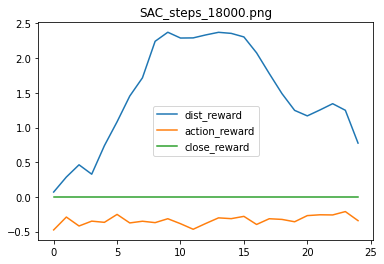

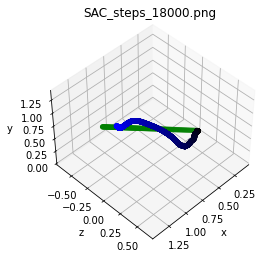

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 22.1     |
| time/              |          |
|    episodes        | 765      |
|    fps             | 866      |
|    time_elapsed    | 20       |
|    total timesteps | 18019    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.751    |
|    ent_coef        | 0.0238   |
|    ent_coef_loss   | 0.828    |
|    learning_rate   | 0.0003   |
|    n_updates       | 17918    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 22.2     |
| time/              |          |
|    episodes        | 766      |
|    fps             | 381      |
|    time_elapsed    | 47       |
|    total timesteps | 18044    |
| train/             |          |
|    actor_loss      | -8.8     |
|    critic_loss     | 0.991    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    episodes        | 780      |
|    fps             | 43       |
|    time_elapsed    | 427      |
|    total timesteps | 18404    |
| train/             |          |
|    actor_loss      | -8.73    |
|    critic_loss     | 0.842    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | 1.22     |
|    learning_rate   | 0.0003   |
|    n_updates       | 18303    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 21.4     |
| time/              |          |
|    episodes        | 781      |
|    fps             | 40       |
|    time_elapsed    | 460      |
|    total timesteps | 18436    |
| train/             |          |
|    actor_loss      | -9.89    |
|    critic_loss     | 1.02     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 21.8     |
| time/              |          |
|    episodes        | 795      |
|    fps             | 21       |
|    time_elapsed    | 881      |
|    total timesteps | 18839    |
| train/             |          |
|    actor_loss      | -9.12    |
|    critic_loss     | 1.2      |
|    ent_coef        | 0.0247   |
|    ent_coef_loss   | 0.198    |
|    learning_rate   | 0.0003   |
|    n_updates       | 18738    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 21.8     |
| time/              |          |
|    episodes        | 796      |
|    fps             | 20       |
|    time_elapsed    | 907      |
|    total timesteps | 18863    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.927    |
|    ent_coef 

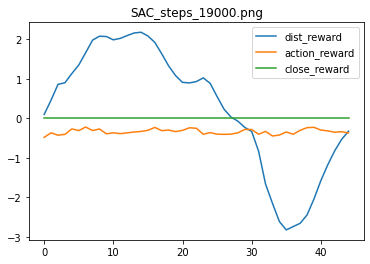

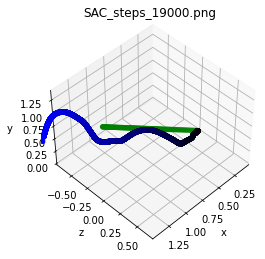

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    episodes        | 802      |
|    fps             | 958      |
|    time_elapsed    | 19       |
|    total timesteps | 19018    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.665    |
|    ent_coef        | 0.0248   |
|    ent_coef_loss   | 0.54     |
|    learning_rate   | 0.0003   |
|    n_updates       | 18917    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 21.8     |
| time/              |          |
|    episodes        | 803      |
|    fps             | 438      |
|    time_elapsed    | 43       |
|    total timesteps | 19040    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.617    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 22.6     |
| time/              |          |
|    episodes        | 817      |
|    fps             | 42       |
|    time_elapsed    | 459      |
|    total timesteps | 19437    |
| train/             |          |
|    actor_loss      | -9.91    |
|    critic_loss     | 0.776    |
|    ent_coef        | 0.0247   |
|    ent_coef_loss   | -0.559   |
|    learning_rate   | 0.0003   |
|    n_updates       | 19336    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 22.7     |
| time/              |          |
|    episodes        | 818      |
|    fps             | 40       |
|    time_elapsed    | 485      |
|    total timesteps | 19462    |
| train/             |          |
|    actor_loss      | -9.9     |
|    critic_loss     | 0.782    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23.4     |
| time/              |          |
|    episodes        | 832      |
|    fps             | 22       |
|    time_elapsed    | 880      |
|    total timesteps | 19838    |
| train/             |          |
|    actor_loss      | -9.71    |
|    critic_loss     | 0.595    |
|    ent_coef        | 0.0245   |
|    ent_coef_loss   | -0.649   |
|    learning_rate   | 0.0003   |
|    n_updates       | 19737    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    episodes        | 833      |
|    fps             | 22       |
|    time_elapsed    | 896      |
|    total timesteps | 19852    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.735    |
|    ent_coef 

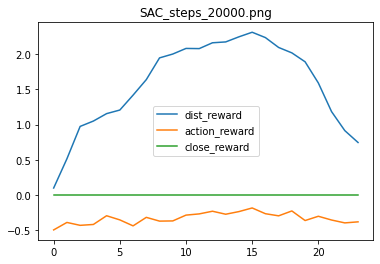

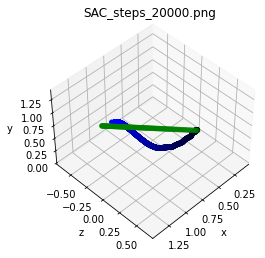

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23       |
| time/              |          |
|    episodes        | 839      |
|    fps             | 922      |
|    time_elapsed    | 21       |
|    total timesteps | 20020    |
| train/             |          |
|    actor_loss      | -9.44    |
|    critic_loss     | 0.568    |
|    ent_coef        | 0.0245   |
|    ent_coef_loss   | -0.87    |
|    learning_rate   | 0.0003   |
|    n_updates       | 19919    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23.1     |
| time/              |          |
|    episodes        | 840      |
|    fps             | 408      |
|    time_elapsed    | 49       |
|    total timesteps | 20046    |
| train/             |          |
|    actor_loss      | -9.16    |
|    critic_loss     | 0.675    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 23.4     |
| time/              |          |
|    episodes        | 854      |
|    fps             | 47       |
|    time_elapsed    | 433      |
|    total timesteps | 20411    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.706    |
|    ent_coef        | 0.0246   |
|    ent_coef_loss   | -0.245   |
|    learning_rate   | 0.0003   |
|    n_updates       | 20310    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23.4     |
| time/              |          |
|    episodes        | 855      |
|    fps             | 43       |
|    time_elapsed    | 470      |
|    total timesteps | 20447    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.749    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.8     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 869      |
|    fps             | 24       |
|    time_elapsed    | 865      |
|    total timesteps | 20823    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.978    |
|    ent_coef        | 0.0242   |
|    ent_coef_loss   | -0.645   |
|    learning_rate   | 0.0003   |
|    n_updates       | 20722    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 870      |
|    fps             | 23       |
|    time_elapsed    | 901      |
|    total timesteps | 20858    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.721    |
|    ent_coef 

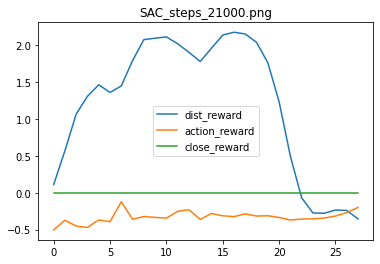

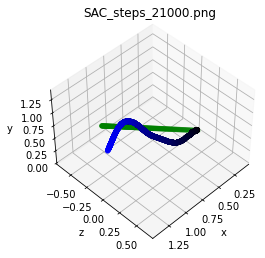

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 876      |
|    fps             | 1233     |
|    time_elapsed    | 17       |
|    total timesteps | 21015    |
| train/             |          |
|    actor_loss      | -9.97    |
|    critic_loss     | 1.97     |
|    ent_coef        | 0.0242   |
|    ent_coef_loss   | 0.904    |
|    learning_rate   | 0.0003   |
|    n_updates       | 20914    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 877      |
|    fps             | 434      |
|    time_elapsed    | 48       |
|    total timesteps | 21045    |
| train/             |          |
|    actor_loss      | -9.41    |
|    critic_loss     | 0.835    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 891      |
|    fps             | 45       |
|    time_elapsed    | 466      |
|    total timesteps | 21443    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.599    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | -0.084   |
|    learning_rate   | 0.0003   |
|    n_updates       | 21342    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 892      |
|    fps             | 43       |
|    time_elapsed    | 492      |
|    total timesteps | 21468    |
| train/             |          |
|    actor_loss      | -9.65    |
|    critic_loss     | 0.826    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 906      |
|    fps             | 25       |
|    time_elapsed    | 868      |
|    total timesteps | 21823    |
| train/             |          |
|    actor_loss      | -9.4     |
|    critic_loss     | 0.735    |
|    ent_coef        | 0.0248   |
|    ent_coef_loss   | 0.0336   |
|    learning_rate   | 0.0003   |
|    n_updates       | 21722    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 907      |
|    fps             | 24       |
|    time_elapsed    | 895      |
|    total timesteps | 21849    |
| train/             |          |
|    actor_loss      | -9.96    |
|    critic_loss     | 0.627    |
|    ent_coef 

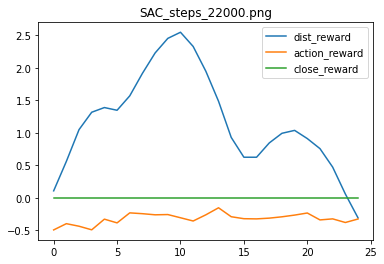

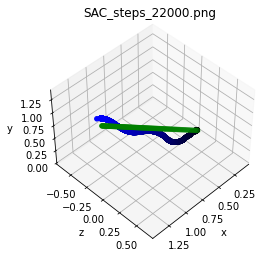

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 913      |
|    fps             | 823      |
|    time_elapsed    | 26       |
|    total timesteps | 22025    |
| train/             |          |
|    actor_loss      | -9.71    |
|    critic_loss     | 0.892    |
|    ent_coef        | 0.0248   |
|    ent_coef_loss   | -0.425   |
|    learning_rate   | 0.0003   |
|    n_updates       | 21924    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 914      |
|    fps             | 406      |
|    time_elapsed    | 54       |
|    total timesteps | 22051    |
| train/             |          |
|    actor_loss      | -9.93    |
|    critic_loss     | 0.71     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.7     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 928      |
|    fps             | 52       |
|    time_elapsed    | 428      |
|    total timesteps | 22406    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.678    |
|    ent_coef        | 0.0245   |
|    ent_coef_loss   | -0.426   |
|    learning_rate   | 0.0003   |
|    n_updates       | 22305    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.8     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 929      |
|    fps             | 48       |
|    time_elapsed    | 460      |
|    total timesteps | 22436    |
| train/             |          |
|    actor_loss      | -9.9     |
|    critic_loss     | 0.738    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 943      |
|    fps             | 26       |
|    time_elapsed    | 853      |
|    total timesteps | 22809    |
| train/             |          |
|    actor_loss      | -9.99    |
|    critic_loss     | 0.65     |
|    ent_coef        | 0.0246   |
|    ent_coef_loss   | -0.345   |
|    learning_rate   | 0.0003   |
|    n_updates       | 22708    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 944      |
|    fps             | 25       |
|    time_elapsed    | 883      |
|    total timesteps | 22838    |
| train/             |          |
|    actor_loss      | -9.87    |
|    critic_loss     | 0.621    |
|    ent_coef 

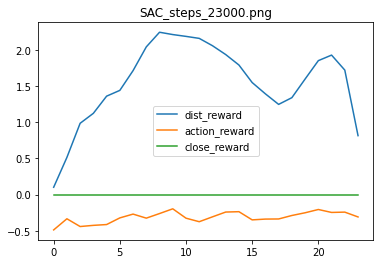

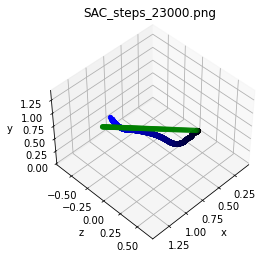

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 951      |
|    fps             | 927      |
|    time_elapsed    | 24       |
|    total timesteps | 23023    |
| train/             |          |
|    actor_loss      | -9.71    |
|    critic_loss     | 0.709    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | -1.18    |
|    learning_rate   | 0.0003   |
|    n_updates       | 22922    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 952      |
|    fps             | 455      |
|    time_elapsed    | 50       |
|    total timesteps | 23047    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.526    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 966      |
|    fps             | 48       |
|    time_elapsed    | 487      |
|    total timesteps | 23464    |
| train/             |          |
|    actor_loss      | -9.94    |
|    critic_loss     | 0.548    |
|    ent_coef        | 0.0245   |
|    ent_coef_loss   | -0.569   |
|    learning_rate   | 0.0003   |
|    n_updates       | 23363    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 967      |
|    fps             | 45       |
|    time_elapsed    | 512      |
|    total timesteps | 23487    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.589    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 981      |
|    fps             | 25       |
|    time_elapsed    | 931      |
|    total timesteps | 23887    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.612    |
|    ent_coef        | 0.0249   |
|    ent_coef_loss   | 1.37     |
|    learning_rate   | 0.0003   |
|    n_updates       | 23786    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 982      |
|    fps             | 24       |
|    time_elapsed    | 962      |
|    total timesteps | 23917    |
| train/             |          |
|    actor_loss      | -9.43    |
|    critic_loss     | 0.784    |
|    ent_coef 

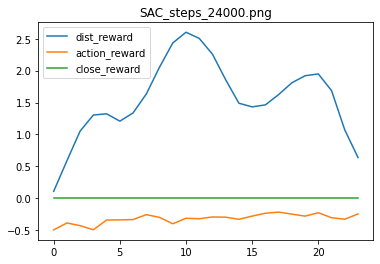

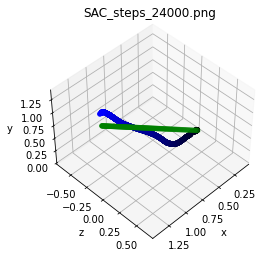

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 986      |
|    fps             | 973      |
|    time_elapsed    | 24       |
|    total timesteps | 24023    |
| train/             |          |
|    actor_loss      | -9.79    |
|    critic_loss     | 0.554    |
|    ent_coef        | 0.025    |
|    ent_coef_loss   | -0.497   |
|    learning_rate   | 0.0003   |
|    n_updates       | 23922    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 987      |
|    fps             | 478      |
|    time_elapsed    | 50       |
|    total timesteps | 24047    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.817    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 1001     |
|    fps             | 51       |
|    time_elapsed    | 471      |
|    total timesteps | 24449    |
| train/             |          |
|    actor_loss      | -8.27    |
|    critic_loss     | 0.701    |
|    ent_coef        | 0.0247   |
|    ent_coef_loss   | -0.543   |
|    learning_rate   | 0.0003   |
|    n_updates       | 24348    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 1002     |
|    fps             | 49       |
|    time_elapsed    | 496      |
|    total timesteps | 24473    |
| train/             |          |
|    actor_loss      | -9.83    |
|    critic_loss     | 0.689    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 1016     |
|    fps             | 27       |
|    time_elapsed    | 895      |
|    total timesteps | 24851    |
| train/             |          |
|    actor_loss      | -9.04    |
|    critic_loss     | 0.927    |
|    ent_coef        | 0.0247   |
|    ent_coef_loss   | -0.448   |
|    learning_rate   | 0.0003   |
|    n_updates       | 24750    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 1017     |
|    fps             | 27       |
|    time_elapsed    | 920      |
|    total timesteps | 24874    |
| train/             |          |
|    actor_loss      | -9.71    |
|    critic_loss     | 0.777    |
|    ent_coef 

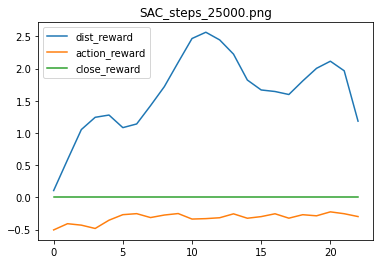

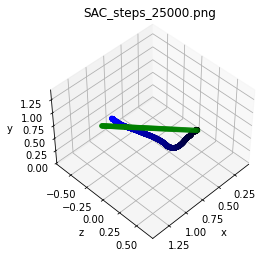

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 1022     |
|    fps             | 5501     |
|    time_elapsed    | 4        |
|    total timesteps | 25002    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.697    |
|    ent_coef        | 0.0247   |
|    ent_coef_loss   | 1.02     |
|    learning_rate   | 0.0003   |
|    n_updates       | 24901    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 1023     |
|    fps             | 829      |
|    time_elapsed    | 30       |
|    total timesteps | 25026    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.685    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.3     |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 1037     |
|    fps             | 63       |
|    time_elapsed    | 401      |
|    total timesteps | 25375    |
| train/             |          |
|    actor_loss      | -10.5    |
|    critic_loss     | 0.711    |
|    ent_coef        | 0.0249   |
|    ent_coef_loss   | -0.104   |
|    learning_rate   | 0.0003   |
|    n_updates       | 25274    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 1038     |
|    fps             | 56       |
|    time_elapsed    | 450      |
|    total timesteps | 25423    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.777    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1052     |
|    fps             | 29       |
|    time_elapsed    | 864      |
|    total timesteps | 25816    |
| train/             |          |
|    actor_loss      | -9.92    |
|    critic_loss     | 0.733    |
|    ent_coef        | 0.0248   |
|    ent_coef_loss   | -0.183   |
|    learning_rate   | 0.0003   |
|    n_updates       | 25715    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1053     |
|    fps             | 28       |
|    time_elapsed    | 891      |
|    total timesteps | 25841    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.52     |
|    ent_coef 

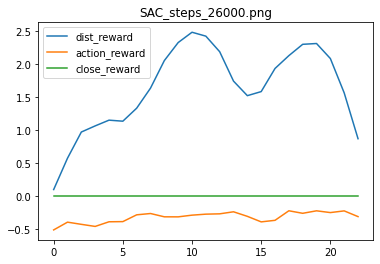

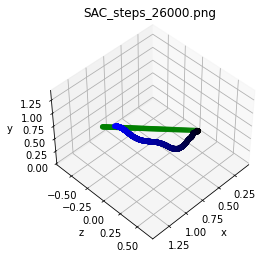

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.5     |
| time/              |          |
|    episodes        | 1059     |
|    fps             | 1437     |
|    time_elapsed    | 18       |
|    total timesteps | 26016    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.753    |
|    ent_coef        | 0.0245   |
|    ent_coef_loss   | -0.409   |
|    learning_rate   | 0.0003   |
|    n_updates       | 25915    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1060     |
|    fps             | 582      |
|    time_elapsed    | 44       |
|    total timesteps | 26041    |
| train/             |          |
|    actor_loss      | -9.91    |
|    critic_loss     | 0.894    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1074     |
|    fps             | 59       |
|    time_elapsed    | 445      |
|    total timesteps | 26420    |
| train/             |          |
|    actor_loss      | -9.65    |
|    critic_loss     | 0.628    |
|    ent_coef        | 0.0244   |
|    ent_coef_loss   | 0.669    |
|    learning_rate   | 0.0003   |
|    n_updates       | 26319    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1075     |
|    fps             | 56       |
|    time_elapsed    | 471      |
|    total timesteps | 26444    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.637    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 1089     |
|    fps             | 31       |
|    time_elapsed    | 845      |
|    total timesteps | 26796    |
| train/             |          |
|    actor_loss      | -8.66    |
|    critic_loss     | 0.648    |
|    ent_coef        | 0.0244   |
|    ent_coef_loss   | 0.0743   |
|    learning_rate   | 0.0003   |
|    n_updates       | 26695    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    episodes        | 1090     |
|    fps             | 30       |
|    time_elapsed    | 871      |
|    total timesteps | 26821    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.841    |
|    ent_coef 

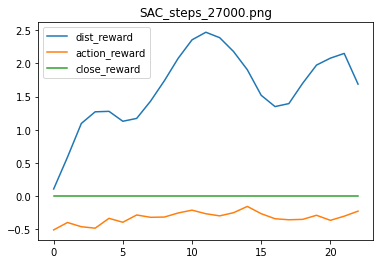

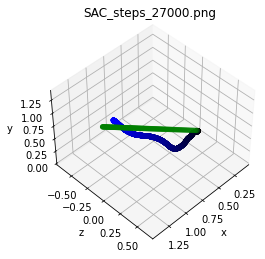

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 1096     |
|    fps             | 7479     |
|    time_elapsed    | 3        |
|    total timesteps | 27001    |
| train/             |          |
|    actor_loss      | -9.75    |
|    critic_loss     | 0.809    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | 0.478    |
|    learning_rate   | 0.0003   |
|    n_updates       | 26900    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 24.2     |
| time/              |          |
|    episodes        | 1097     |
|    fps             | 899      |
|    time_elapsed    | 30       |
|    total timesteps | 27026    |
| train/             |          |
|    actor_loss      | -9.69    |
|    critic_loss     | 0.738    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.8     |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    episodes        | 1111     |
|    fps             | 64       |
|    time_elapsed    | 422      |
|    total timesteps | 27400    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.669    |
|    ent_coef        | 0.024    |
|    ent_coef_loss   | -0.714   |
|    learning_rate   | 0.0003   |
|    n_updates       | 27299    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.8     |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    episodes        | 1112     |
|    fps             | 61       |
|    time_elapsed    | 448      |
|    total timesteps | 27424    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.604    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 24.1     |
| time/              |          |
|    episodes        | 1126     |
|    fps             | 32       |
|    time_elapsed    | 853      |
|    total timesteps | 27811    |
| train/             |          |
|    actor_loss      | -9.92    |
|    critic_loss     | 0.936    |
|    ent_coef        | 0.0241   |
|    ent_coef_loss   | -0.339   |
|    learning_rate   | 0.0003   |
|    n_updates       | 27710    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 1127     |
|    fps             | 31       |
|    time_elapsed    | 884      |
|    total timesteps | 27840    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.689    |
|    ent_coef 

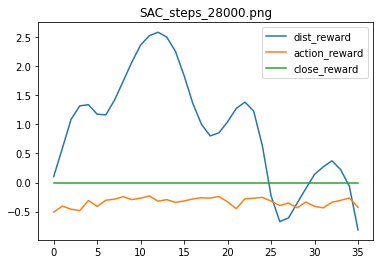

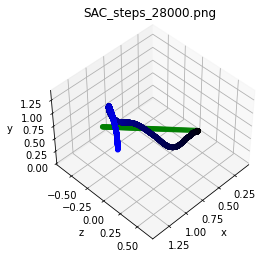

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 1133     |
|    fps             | 1011     |
|    time_elapsed    | 27       |
|    total timesteps | 28026    |
| train/             |          |
|    actor_loss      | -9.74    |
|    critic_loss     | 0.576    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | 0.678    |
|    learning_rate   | 0.0003   |
|    n_updates       | 27925    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.4     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 1134     |
|    fps             | 534      |
|    time_elapsed    | 52       |
|    total timesteps | 28049    |
| train/             |          |
|    actor_loss      | -9.8     |
|    critic_loss     | 0.825    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1148     |
|    fps             | 57       |
|    time_elapsed    | 499      |
|    total timesteps | 28475    |
| train/             |          |
|    actor_loss      | -9.79    |
|    critic_loss     | 0.9      |
|    ent_coef        | 0.0241   |
|    ent_coef_loss   | 0.13     |
|    learning_rate   | 0.0003   |
|    n_updates       | 28374    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.9     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1149     |
|    fps             | 52       |
|    time_elapsed    | 538      |
|    total timesteps | 28513    |
| train/             |          |
|    actor_loss      | -9.33    |
|    critic_loss     | 0.781    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    episodes        | 1163     |
|    fps             | 30       |
|    time_elapsed    | 954      |
|    total timesteps | 28907    |
| train/             |          |
|    actor_loss      | -9.17    |
|    critic_loss     | 0.803    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | 0.675    |
|    learning_rate   | 0.0003   |
|    n_updates       | 28806    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | 24.4     |
| time/              |          |
|    episodes        | 1164     |
|    fps             | 29       |
|    time_elapsed    | 978      |
|    total timesteps | 28929    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.864    |
|    ent_coef 

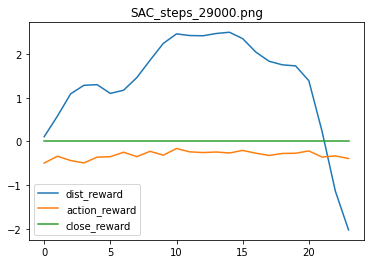

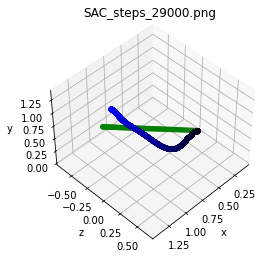

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.6     |
|    ep_rew_mean     | 24.4     |
| time/              |          |
|    episodes        | 1167     |
|    fps             | 3093     |
|    time_elapsed    | 9        |
|    total timesteps | 29007    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.727    |
|    ent_coef        | 0.0243   |
|    ent_coef_loss   | 0.793    |
|    learning_rate   | 0.0003   |
|    n_updates       | 28906    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    episodes        | 1168     |
|    fps             | 587      |
|    time_elapsed    | 49       |
|    total timesteps | 29046    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.749    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1182     |
|    fps             | 59       |
|    time_elapsed    | 493      |
|    total timesteps | 29469    |
| train/             |          |
|    actor_loss      | -9.03    |
|    critic_loss     | 0.625    |
|    ent_coef        | 0.0241   |
|    ent_coef_loss   | -0.612   |
|    learning_rate   | 0.0003   |
|    n_updates       | 29368    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 23.5     |
| time/              |          |
|    episodes        | 1183     |
|    fps             | 56       |
|    time_elapsed    | 526      |
|    total timesteps | 29501    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.719    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.1     |
|    ep_rew_mean     | 23.1     |
| time/              |          |
|    episodes        | 1197     |
|    fps             | 30       |
|    time_elapsed    | 985      |
|    total timesteps | 29939    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 1.19     |
|    ent_coef        | 0.0239   |
|    ent_coef_loss   | 0.507    |
|    learning_rate   | 0.0003   |
|    n_updates       | 29838    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.2     |
|    ep_rew_mean     | 23       |
| time/              |          |
|    episodes        | 1198     |
|    fps             | 29       |
|    time_elapsed    | 1018     |
|    total timesteps | 29971    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.62     |
|    ent_coef 

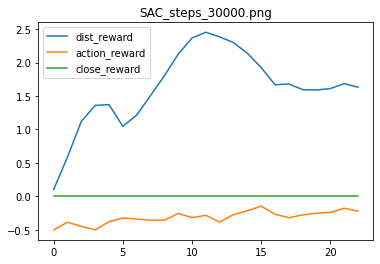

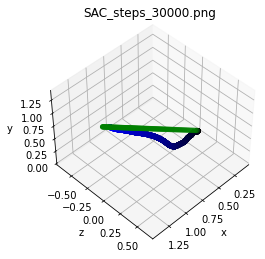

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    episodes        | 1200     |
|    fps             | 1081     |
|    time_elapsed    | 27       |
|    total timesteps | 30026    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.65     |
|    ent_coef        | 0.0241   |
|    ent_coef_loss   | 0.724    |
|    learning_rate   | 0.0003   |
|    n_updates       | 29925    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 23.3     |
| time/              |          |
|    episodes        | 1201     |
|    fps             | 572      |
|    time_elapsed    | 52       |
|    total timesteps | 30049    |
| train/             |          |
|    actor_loss      | -8.97    |
|    critic_loss     | 0.996    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.3     |
|    ep_rew_mean     | 23.3     |
| time/              |          |
|    episodes        | 1215     |
|    fps             | 66       |
|    time_elapsed    | 460      |
|    total timesteps | 30435    |
| train/             |          |
|    actor_loss      | -9.58    |
|    critic_loss     | 0.607    |
|    ent_coef        | 0.0236   |
|    ent_coef_loss   | -1.66    |
|    learning_rate   | 0.0003   |
|    n_updates       | 30334    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29.5     |
|    ep_rew_mean     | 23.2     |
| time/              |          |
|    episodes        | 1216     |
|    fps             | 61       |
|    time_elapsed    | 495      |
|    total timesteps | 30469    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 1.47     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1230     |
|    fps             | 35       |
|    time_elapsed    | 875      |
|    total timesteps | 30826    |
| train/             |          |
|    actor_loss      | -9.89    |
|    critic_loss     | 0.578    |
|    ent_coef        | 0.0232   |
|    ent_coef_loss   | -0.38    |
|    learning_rate   | 0.0003   |
|    n_updates       | 30725    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    episodes        | 1231     |
|    fps             | 34       |
|    time_elapsed    | 904      |
|    total timesteps | 30854    |
| train/             |          |
|    actor_loss      | -9.43    |
|    critic_loss     | 0.618    |
|    ent_coef 

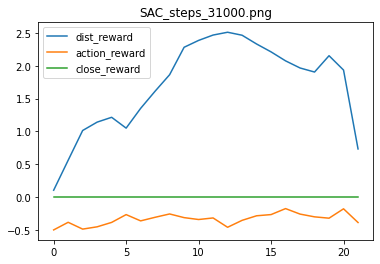

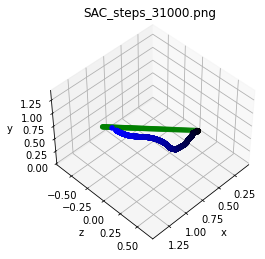

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.9     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 1237     |
|    fps             | 897      |
|    time_elapsed    | 34       |
|    total timesteps | 31033    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.643    |
|    ent_coef        | 0.0229   |
|    ent_coef_loss   | 1.03     |
|    learning_rate   | 0.0003   |
|    n_updates       | 30932    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1238     |
|    fps             | 438      |
|    time_elapsed    | 70       |
|    total timesteps | 31068    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.576    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 1252     |
|    fps             | 67       |
|    time_elapsed    | 468      |
|    total timesteps | 31444    |
| train/             |          |
|    actor_loss      | -9.3     |
|    critic_loss     | 0.649    |
|    ent_coef        | 0.0232   |
|    ent_coef_loss   | -0.363   |
|    learning_rate   | 0.0003   |
|    n_updates       | 31343    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.4     |
|    ep_rew_mean     | 24       |
| time/              |          |
|    episodes        | 1253     |
|    fps             | 63       |
|    time_elapsed    | 497      |
|    total timesteps | 31471    |
| train/             |          |
|    actor_loss      | -9.87    |
|    critic_loss     | 1.01     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.8     |
|    ep_rew_mean     | 23.7     |
| time/              |          |
|    episodes        | 1267     |
|    fps             | 34       |
|    time_elapsed    | 930      |
|    total timesteps | 31882    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.735    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | 0.979    |
|    learning_rate   | 0.0003   |
|    n_updates       | 31781    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.7     |
|    ep_rew_mean     | 23.8     |
| time/              |          |
|    episodes        | 1268     |
|    fps             | 33       |
|    time_elapsed    | 962      |
|    total timesteps | 31912    |
| train/             |          |
|    actor_loss      | -8.93    |
|    critic_loss     | 0.801    |
|    ent_coef 

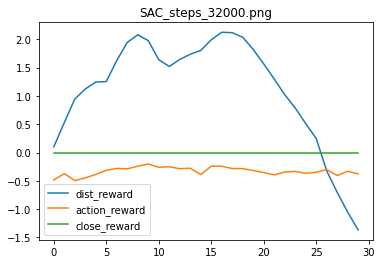

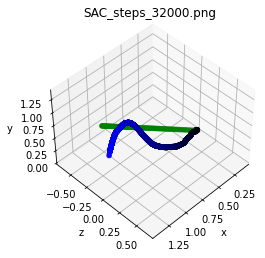

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.7     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 1271     |
|    fps             | 4898     |
|    time_elapsed    | 6        |
|    total timesteps | 32004    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.809    |
|    ent_coef        | 0.0232   |
|    ent_coef_loss   | 0.502    |
|    learning_rate   | 0.0003   |
|    n_updates       | 31903    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.6     |
|    ep_rew_mean     | 23.9     |
| time/              |          |
|    episodes        | 1272     |
|    fps             | 1177     |
|    time_elapsed    | 27       |
|    total timesteps | 32023    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.789    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 28.2     |
|    ep_rew_mean     | 24.4     |
| time/              |          |
|    episodes        | 1286     |
|    fps             | 74       |
|    time_elapsed    | 436      |
|    total timesteps | 32412    |
| train/             |          |
|    actor_loss      | -9.44    |
|    critic_loss     | 0.654    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | 0.309    |
|    learning_rate   | 0.0003   |
|    n_updates       | 32311    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.9     |
|    ep_rew_mean     | 24.5     |
| time/              |          |
|    episodes        | 1287     |
|    fps             | 69       |
|    time_elapsed    | 465      |
|    total timesteps | 32440    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.617    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 1301     |
|    fps             | 37       |
|    time_elapsed    | 869      |
|    total timesteps | 32825    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.635    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | 0.231    |
|    learning_rate   | 0.0003   |
|    n_updates       | 32724    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 1302     |
|    fps             | 36       |
|    time_elapsed    | 895      |
|    total timesteps | 32849    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.607    |
|    ent_coef 

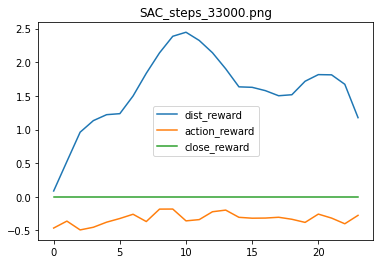

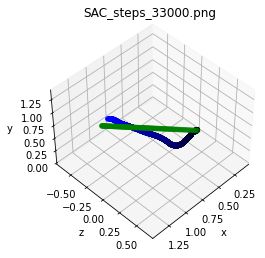

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 1309     |
|    fps             | 1505     |
|    time_elapsed    | 21       |
|    total timesteps | 33020    |
| train/             |          |
|    actor_loss      | -9.28    |
|    critic_loss     | 0.894    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | 0.221    |
|    learning_rate   | 0.0003   |
|    n_updates       | 32919    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.8     |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 1310     |
|    fps             | 668      |
|    time_elapsed    | 49       |
|    total timesteps | 33046    |
| train/             |          |
|    actor_loss      | -9.68    |
|    critic_loss     | 0.577    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1324     |
|    fps             | 74       |
|    time_elapsed    | 448      |
|    total timesteps | 33426    |
| train/             |          |
|    actor_loss      | -9.76    |
|    critic_loss     | 0.625    |
|    ent_coef        | 0.0234   |
|    ent_coef_loss   | -0.0423  |
|    learning_rate   | 0.0003   |
|    n_updates       | 33325    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.5     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1325     |
|    fps             | 70       |
|    time_elapsed    | 477      |
|    total timesteps | 33453    |
| train/             |          |
|    actor_loss      | -10      |
|    critic_loss     | 0.597    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.2     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1339     |
|    fps             | 39       |
|    time_elapsed    | 863      |
|    total timesteps | 33819    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.497    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | -0.0261  |
|    learning_rate   | 0.0003   |
|    n_updates       | 33718    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.1     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1340     |
|    fps             | 38       |
|    time_elapsed    | 889      |
|    total timesteps | 33843    |
| train/             |          |
|    actor_loss      | -9.45    |
|    critic_loss     | 0.659    |
|    ent_coef 

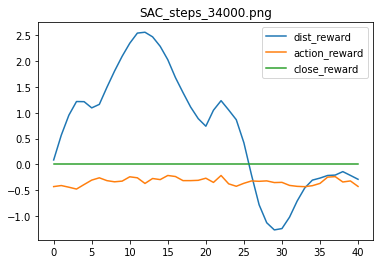

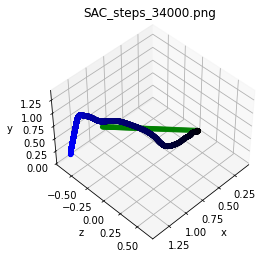

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.9     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1347     |
|    fps             | 2251     |
|    time_elapsed    | 15       |
|    total timesteps | 34013    |
| train/             |          |
|    actor_loss      | -10.6    |
|    critic_loss     | 0.792    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | 1.12     |
|    learning_rate   | 0.0003   |
|    n_updates       | 33912    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27       |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1348     |
|    fps             | 804      |
|    time_elapsed    | 42       |
|    total timesteps | 34039    |
| train/             |          |
|    actor_loss      | -9.53    |
|    critic_loss     | 0.7      |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.6     |
|    ep_rew_mean     | 26       |
| time/              |          |
|    episodes        | 1362     |
|    fps             | 81       |
|    time_elapsed    | 421      |
|    total timesteps | 34398    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.448    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | 0.0307   |
|    learning_rate   | 0.0003   |
|    n_updates       | 34297    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1363     |
|    fps             | 79       |
|    time_elapsed    | 433      |
|    total timesteps | 34408    |
| train/             |          |
|    actor_loss      | -9.91    |
|    critic_loss     | 0.684    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.6     |
| time/              |          |
|    episodes        | 1377     |
|    fps             | 43       |
|    time_elapsed    | 797      |
|    total timesteps | 34752    |
| train/             |          |
|    actor_loss      | -8.73    |
|    critic_loss     | 0.718    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | 0.626    |
|    learning_rate   | 0.0003   |
|    n_updates       | 34651    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 25.6     |
| time/              |          |
|    episodes        | 1378     |
|    fps             | 42       |
|    time_elapsed    | 823      |
|    total timesteps | 34777    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.631    |
|    ent_coef 

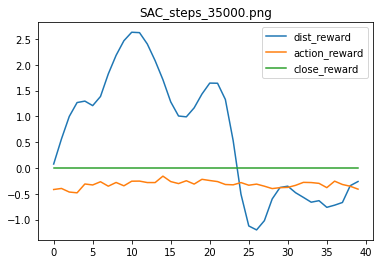

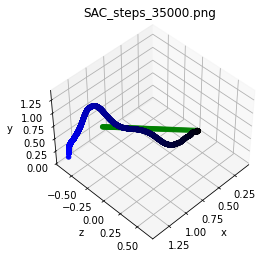

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 25.3     |
| time/              |          |
|    episodes        | 1387     |
|    fps             | 3382     |
|    time_elapsed    | 10       |
|    total timesteps | 35008    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.709    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | 0.196    |
|    learning_rate   | 0.0003   |
|    n_updates       | 34907    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1388     |
|    fps             | 976      |
|    time_elapsed    | 35       |
|    total timesteps | 35032    |
| train/             |          |
|    actor_loss      | -9.74    |
|    critic_loss     | 0.64     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1402     |
|    fps             | 82       |
|    time_elapsed    | 429      |
|    total timesteps | 35406    |
| train/             |          |
|    actor_loss      | -9.46    |
|    critic_loss     | 0.792    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | 0.389    |
|    learning_rate   | 0.0003   |
|    n_updates       | 35305    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1403     |
|    fps             | 77       |
|    time_elapsed    | 456      |
|    total timesteps | 35431    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.827    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.5     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1417     |
|    fps             | 42       |
|    time_elapsed    | 846      |
|    total timesteps | 35801    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.575    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | -0.394   |
|    learning_rate   | 0.0003   |
|    n_updates       | 35700    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.5     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    episodes        | 1418     |
|    fps             | 41       |
|    time_elapsed    | 871      |
|    total timesteps | 35824    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.681    |
|    ent_coef 

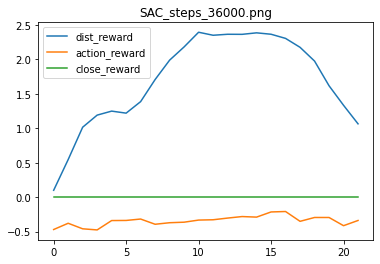

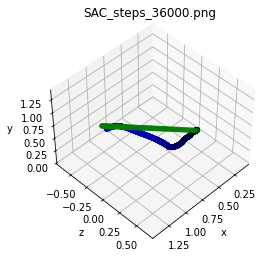

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1426     |
|    fps             | 1307     |
|    time_elapsed    | 27       |
|    total timesteps | 36026    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.717    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | -0.356   |
|    learning_rate   | 0.0003   |
|    n_updates       | 35925    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1427     |
|    fps             | 705      |
|    time_elapsed    | 51       |
|    total timesteps | 36048    |
| train/             |          |
|    actor_loss      | -9.69    |
|    critic_loss     | 1.25     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.5     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1441     |
|    fps             | 81       |
|    time_elapsed    | 445      |
|    total timesteps | 36424    |
| train/             |          |
|    actor_loss      | -9.49    |
|    critic_loss     | 0.601    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | 0.613    |
|    learning_rate   | 0.0003   |
|    n_updates       | 36323    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1442     |
|    fps             | 76       |
|    time_elapsed    | 478      |
|    total timesteps | 36456    |
| train/             |          |
|    actor_loss      | -9.4     |
|    critic_loss     | 0.944    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1456     |
|    fps             | 43       |
|    time_elapsed    | 840      |
|    total timesteps | 36797    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.837    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | -0.552   |
|    learning_rate   | 0.0003   |
|    n_updates       | 36696    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1457     |
|    fps             | 42       |
|    time_elapsed    | 867      |
|    total timesteps | 36822    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.721    |
|    ent_coef 

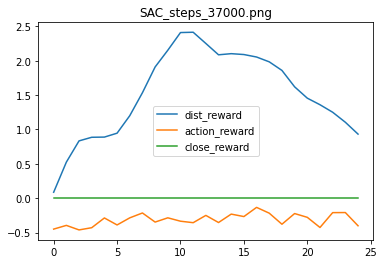

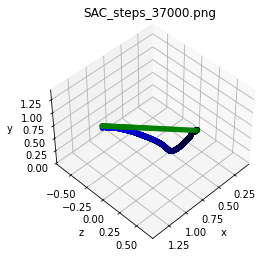

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 24.6     |
| time/              |          |
|    episodes        | 1464     |
|    fps             | 3298     |
|    time_elapsed    | 11       |
|    total timesteps | 37009    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.754    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | -0.0354  |
|    learning_rate   | 0.0003   |
|    n_updates       | 36908    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 24.7     |
| time/              |          |
|    episodes        | 1465     |
|    fps             | 910      |
|    time_elapsed    | 40       |
|    total timesteps | 37037    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.558    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 24.9     |
| time/              |          |
|    episodes        | 1479     |
|    fps             | 85       |
|    time_elapsed    | 438      |
|    total timesteps | 37415    |
| train/             |          |
|    actor_loss      | -9.96    |
|    critic_loss     | 0.709    |
|    ent_coef        | 0.0226   |
|    ent_coef_loss   | 0.0818   |
|    learning_rate   | 0.0003   |
|    n_updates       | 37314    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 24.7     |
| time/              |          |
|    episodes        | 1480     |
|    fps             | 78       |
|    time_elapsed    | 476      |
|    total timesteps | 37451    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 1.01     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1494     |
|    fps             | 42       |
|    time_elapsed    | 884      |
|    total timesteps | 37840    |
| train/             |          |
|    actor_loss      | -10.5    |
|    critic_loss     | 0.559    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | 0.504    |
|    learning_rate   | 0.0003   |
|    n_updates       | 37739    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1495     |
|    fps             | 41       |
|    time_elapsed    | 908      |
|    total timesteps | 37863    |
| train/             |          |
|    actor_loss      | -10.5    |
|    critic_loss     | 0.608    |
|    ent_coef 

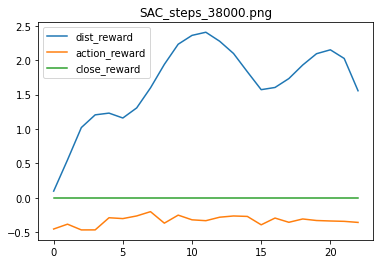

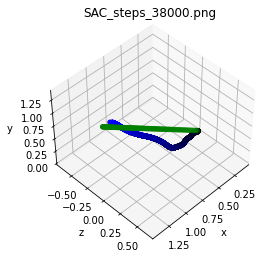

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 25.1     |
| time/              |          |
|    episodes        | 1501     |
|    fps             | 10605    |
|    time_elapsed    | 3        |
|    total timesteps | 38001    |
| train/             |          |
|    actor_loss      | -9.84    |
|    critic_loss     | 0.86     |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.77    |
|    learning_rate   | 0.0003   |
|    n_updates       | 37900    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1502     |
|    fps             | 1315     |
|    time_elapsed    | 28       |
|    total timesteps | 38025    |
| train/             |          |
|    actor_loss      | -11.6    |
|    critic_loss     | 0.675    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1516     |
|    fps             | 101      |
|    time_elapsed    | 378      |
|    total timesteps | 38352    |
| train/             |          |
|    actor_loss      | -9.35    |
|    critic_loss     | 0.833    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | 0.112    |
|    learning_rate   | 0.0003   |
|    n_updates       | 38251    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1517     |
|    fps             | 94       |
|    time_elapsed    | 404      |
|    total timesteps | 38376    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.563    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 25.7     |
| time/              |          |
|    episodes        | 1531     |
|    fps             | 48       |
|    time_elapsed    | 806      |
|    total timesteps | 38758    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.633    |
|    ent_coef        | 0.0223   |
|    ent_coef_loss   | -0.101   |
|    learning_rate   | 0.0003   |
|    n_updates       | 38657    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 25.7     |
| time/              |          |
|    episodes        | 1532     |
|    fps             | 46       |
|    time_elapsed    | 839      |
|    total timesteps | 38790    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.891    |
|    ent_coef 

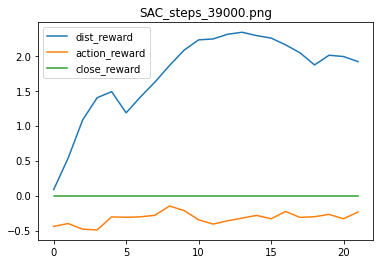

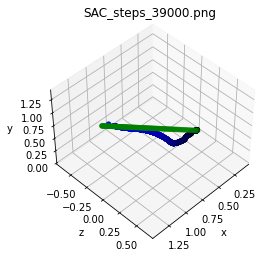

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.3     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1539     |
|    fps             | 3172     |
|    time_elapsed    | 12       |
|    total timesteps | 39010    |
| train/             |          |
|    actor_loss      | -9.63    |
|    critic_loss     | 0.649    |
|    ent_coef        | 0.0221   |
|    ent_coef_loss   | 0.241    |
|    learning_rate   | 0.0003   |
|    n_updates       | 38909    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.3     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1540     |
|    fps             | 1003     |
|    time_elapsed    | 38       |
|    total timesteps | 39035    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.54     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.4     |
|    ep_rew_mean     | 25.2     |
| time/              |          |
|    episodes        | 1554     |
|    fps             | 94       |
|    time_elapsed    | 415      |
|    total timesteps | 39392    |
| train/             |          |
|    actor_loss      | -8.68    |
|    critic_loss     | 0.719    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | 0.246    |
|    learning_rate   | 0.0003   |
|    n_updates       | 39291    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | 25       |
| time/              |          |
|    episodes        | 1555     |
|    fps             | 91       |
|    time_elapsed    | 428      |
|    total timesteps | 39403    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.515    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.9     |
| time/              |          |
|    episodes        | 1569     |
|    fps             | 49       |
|    time_elapsed    | 795      |
|    total timesteps | 39750    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.513    |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | -0.486   |
|    learning_rate   | 0.0003   |
|    n_updates       | 39649    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1570     |
|    fps             | 48       |
|    time_elapsed    | 825      |
|    total timesteps | 39779    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.628    |
|    ent_coef 

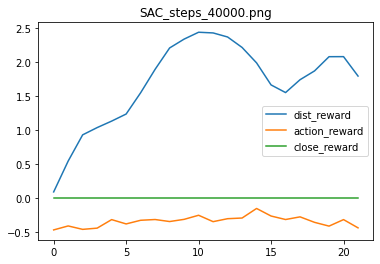

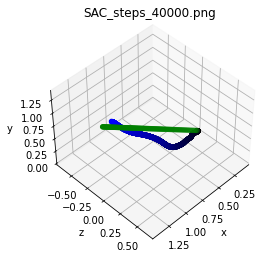

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.9     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1579     |
|    fps             | 8859     |
|    time_elapsed    | 4        |
|    total timesteps | 40002    |
| train/             |          |
|    actor_loss      | -9.77    |
|    critic_loss     | 0.591    |
|    ent_coef        | 0.023    |
|    ent_coef_loss   | -0.35    |
|    learning_rate   | 0.0003   |
|    n_updates       | 39901    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.8     |
|    ep_rew_mean     | 25.5     |
| time/              |          |
|    episodes        | 1580     |
|    fps             | 1159     |
|    time_elapsed    | 34       |
|    total timesteps | 40031    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.782    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 26       |
| time/              |          |
|    episodes        | 1594     |
|    fps             | 100      |
|    time_elapsed    | 403      |
|    total timesteps | 40380    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.741    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | -1.44    |
|    learning_rate   | 0.0003   |
|    n_updates       | 40279    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 26       |
| time/              |          |
|    episodes        | 1595     |
|    fps             | 93       |
|    time_elapsed    | 431      |
|    total timesteps | 40407    |
| train/             |          |
|    actor_loss      | -9.93    |
|    critic_loss     | 0.575    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1609     |
|    fps             | 48       |
|    time_elapsed    | 833      |
|    total timesteps | 40791    |
| train/             |          |
|    actor_loss      | -10.4    |
|    critic_loss     | 0.582    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.213   |
|    learning_rate   | 0.0003   |
|    n_updates       | 40690    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1610     |
|    fps             | 47       |
|    time_elapsed    | 860      |
|    total timesteps | 40816    |
| train/             |          |
|    actor_loss      | -11.2    |
|    critic_loss     | 0.529    |
|    ent_coef 

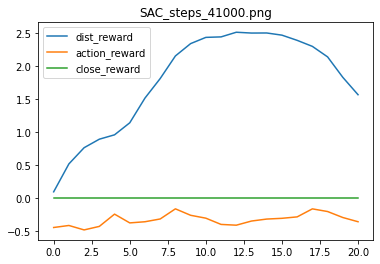

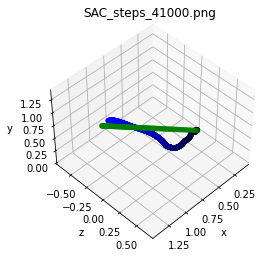

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1618     |
|    fps             | 1819     |
|    time_elapsed    | 22       |
|    total timesteps | 41021    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.585    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | 0.622    |
|    learning_rate   | 0.0003   |
|    n_updates       | 40920    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26       |
|    ep_rew_mean     | 25.8     |
| time/              |          |
|    episodes        | 1619     |
|    fps             | 855      |
|    time_elapsed    | 47       |
|    total timesteps | 41045    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.701    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 26.1     |
| time/              |          |
|    episodes        | 1633     |
|    fps             | 96       |
|    time_elapsed    | 428      |
|    total timesteps | 41407    |
| train/             |          |
|    actor_loss      | -11      |
|    critic_loss     | 0.682    |
|    ent_coef        | 0.0229   |
|    ent_coef_loss   | 0.275    |
|    learning_rate   | 0.0003   |
|    n_updates       | 41306    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.6     |
|    ep_rew_mean     | 26.1     |
| time/              |          |
|    episodes        | 1634     |
|    fps             | 91       |
|    time_elapsed    | 452      |
|    total timesteps | 41429    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.722    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | 26.7     |
| time/              |          |
|    episodes        | 1648     |
|    fps             | 51       |
|    time_elapsed    | 810      |
|    total timesteps | 41764    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.439    |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | 0.694    |
|    learning_rate   | 0.0003   |
|    n_updates       | 41663    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | 26.8     |
| time/              |          |
|    episodes        | 1649     |
|    fps             | 49       |
|    time_elapsed    | 836      |
|    total timesteps | 41788    |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.592    |
|    ent_coef 

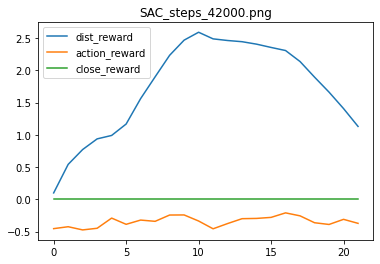

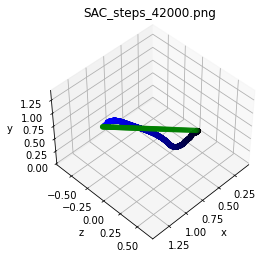

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | 27.4     |
| time/              |          |
|    episodes        | 1659     |
|    fps             | 2789     |
|    time_elapsed    | 15       |
|    total timesteps | 42013    |
| train/             |          |
|    actor_loss      | -9.14    |
|    critic_loss     | 0.653    |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | -0.148   |
|    learning_rate   | 0.0003   |
|    n_updates       | 41912    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | 27.2     |
| time/              |          |
|    episodes        | 1660     |
|    fps             | 739      |
|    time_elapsed    | 56       |
|    total timesteps | 42054    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.427    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 1674     |
|    fps             | 99       |
|    time_elapsed    | 424      |
|    total timesteps | 42402    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.637    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.272   |
|    learning_rate   | 0.0003   |
|    n_updates       | 42301    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 1675     |
|    fps             | 94       |
|    time_elapsed    | 450      |
|    total timesteps | 42426    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.774    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 27.4     |
| time/              |          |
|    episodes        | 1689     |
|    fps             | 51       |
|    time_elapsed    | 833      |
|    total timesteps | 42791    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.74     |
|    ent_coef        | 0.0221   |
|    ent_coef_loss   | -0.529   |
|    learning_rate   | 0.0003   |
|    n_updates       | 42690    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.5     |
|    ep_rew_mean     | 27.4     |
| time/              |          |
|    episodes        | 1690     |
|    fps             | 49       |
|    time_elapsed    | 865      |
|    total timesteps | 42822    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.552    |
|    ent_coef 

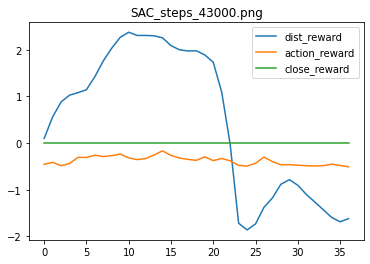

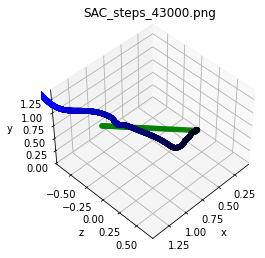

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | 27.6     |
| time/              |          |
|    episodes        | 1698     |
|    fps             | 1820     |
|    time_elapsed    | 23       |
|    total timesteps | 43022    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.543    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | 1.16     |
|    learning_rate   | 0.0003   |
|    n_updates       | 42921    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.2     |
|    ep_rew_mean     | 27.6     |
| time/              |          |
|    episodes        | 1699     |
|    fps             | 875      |
|    time_elapsed    | 49       |
|    total timesteps | 43046    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.739    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 1713     |
|    fps             | 107      |
|    time_elapsed    | 404      |
|    total timesteps | 43382    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.518    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.351   |
|    learning_rate   | 0.0003   |
|    n_updates       | 43281    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | 27.7     |
| time/              |          |
|    episodes        | 1714     |
|    fps             | 101      |
|    time_elapsed    | 428      |
|    total timesteps | 43405    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.511    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 27.5     |
| time/              |          |
|    episodes        | 1728     |
|    fps             | 53       |
|    time_elapsed    | 823      |
|    total timesteps | 43782    |
| train/             |          |
|    actor_loss      | -11.3    |
|    critic_loss     | 0.58     |
|    ent_coef        | 0.0227   |
|    ent_coef_loss   | -0.537   |
|    learning_rate   | 0.0003   |
|    n_updates       | 43681    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 27.5     |
| time/              |          |
|    episodes        | 1729     |
|    fps             | 51       |
|    time_elapsed    | 848      |
|    total timesteps | 43806    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.586    |
|    ent_coef 

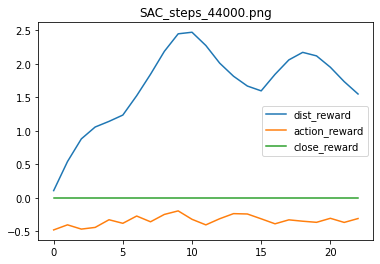

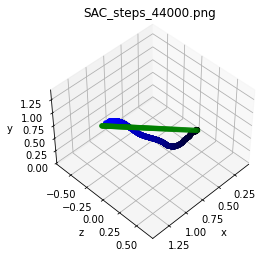

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 27.5     |
| time/              |          |
|    episodes        | 1738     |
|    fps             | 1611     |
|    time_elapsed    | 27       |
|    total timesteps | 44026    |
| train/             |          |
|    actor_loss      | -11.5    |
|    critic_loss     | 0.598    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.366   |
|    learning_rate   | 0.0003   |
|    n_updates       | 43925    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 27.5     |
| time/              |          |
|    episodes        | 1739     |
|    fps             | 865      |
|    time_elapsed    | 50       |
|    total timesteps | 44048    |
| train/             |          |
|    actor_loss      | -11.7    |
|    critic_loss     | 0.444    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | 27.2     |
| time/              |          |
|    episodes        | 1753     |
|    fps             | 112      |
|    time_elapsed    | 393      |
|    total timesteps | 44370    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.53     |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | 0.426    |
|    learning_rate   | 0.0003   |
|    n_updates       | 44269    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 27.1     |
| time/              |          |
|    episodes        | 1754     |
|    fps             | 105      |
|    time_elapsed    | 421      |
|    total timesteps | 44397    |
| train/             |          |
|    actor_loss      | -12.3    |
|    critic_loss     | 0.483    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | 27.3     |
| time/              |          |
|    episodes        | 1768     |
|    fps             | 57       |
|    time_elapsed    | 773      |
|    total timesteps | 44729    |
| train/             |          |
|    actor_loss      | -11.3    |
|    critic_loss     | 0.673    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | -1.64    |
|    learning_rate   | 0.0003   |
|    n_updates       | 44628    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | 27.3     |
| time/              |          |
|    episodes        | 1769     |
|    fps             | 56       |
|    time_elapsed    | 798      |
|    total timesteps | 44753    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.674    |
|    ent_coef 

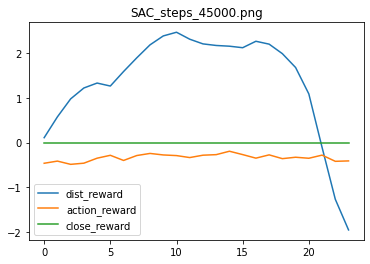

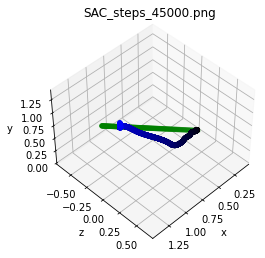

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.6     |
|    ep_rew_mean     | 27.3     |
| time/              |          |
|    episodes        | 1780     |
|    fps             | 1443     |
|    time_elapsed    | 31       |
|    total timesteps | 45030    |
| train/             |          |
|    actor_loss      | -11.5    |
|    critic_loss     | 0.537    |
|    ent_coef        | 0.0226   |
|    ent_coef_loss   | -0.352   |
|    learning_rate   | 0.0003   |
|    n_updates       | 44929    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.7     |
|    ep_rew_mean     | 27.2     |
| time/              |          |
|    episodes        | 1781     |
|    fps             | 720      |
|    time_elapsed    | 62       |
|    total timesteps | 45060    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.708    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 26.9     |
| time/              |          |
|    episodes        | 1795     |
|    fps             | 97       |
|    time_elapsed    | 466      |
|    total timesteps | 45446    |
| train/             |          |
|    actor_loss      | -10.7    |
|    critic_loss     | 0.623    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.0845  |
|    learning_rate   | 0.0003   |
|    n_updates       | 45345    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | 26.9     |
| time/              |          |
|    episodes        | 1796     |
|    fps             | 91       |
|    time_elapsed    | 496      |
|    total timesteps | 45474    |
| train/             |          |
|    actor_loss      | -9.75    |
|    critic_loss     | 0.783    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 26.8     |
| time/              |          |
|    episodes        | 1810     |
|    fps             | 53       |
|    time_elapsed    | 857      |
|    total timesteps | 45814    |
| train/             |          |
|    actor_loss      | -12      |
|    critic_loss     | 0.487    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | -0.92    |
|    learning_rate   | 0.0003   |
|    n_updates       | 45713    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25       |
|    ep_rew_mean     | 26.8     |
| time/              |          |
|    episodes        | 1811     |
|    fps             | 51       |
|    time_elapsed    | 881      |
|    total timesteps | 45837    |
| train/             |          |
|    actor_loss      | -10.8    |
|    critic_loss     | 0.496    |
|    ent_coef 

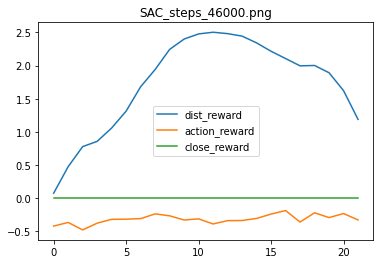

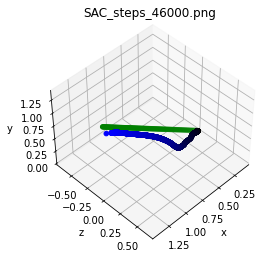

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.1     |
|    ep_rew_mean     | 26.8     |
| time/              |          |
|    episodes        | 1818     |
|    fps             | 2191     |
|    time_elapsed    | 21       |
|    total timesteps | 46018    |
| train/             |          |
|    actor_loss      | -10.9    |
|    critic_loss     | 0.717    |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.4     |
|    learning_rate   | 0.0003   |
|    n_updates       | 45917    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.9     |
|    ep_rew_mean     | 26.9     |
| time/              |          |
|    episodes        | 1819     |
|    fps             | 1015     |
|    time_elapsed    | 45       |
|    total timesteps | 46039    |
| train/             |          |
|    actor_loss      | -10.3    |
|    critic_loss     | 0.524    |
|    ent_coef 

KeyboardInterrupt: 

In [17]:
for i in range(0,length):
    model.learn(total_timesteps=step, log_interval=1, reset_num_timesteps=False)
    cur_steps = cur_steps+step
    img_name =algo+ "_steps_{0}.png".format(cur_steps)
    model.save(network_folder+algofoler+'models/'+"_steps_{0}".format(cur_steps))
    rr = evaluate_env(env_test,model,title=img_name,traj_fig_name=network_folder+algofoler+'imgs/trajs/'+img_name,reward_fig_name=network_folder+algofoler+'imgs/rewards/'+img_name)
    if rr>last_best_reward:
        last_best_reward=rr
        model.save(network_folder+algofoler+'models/best')

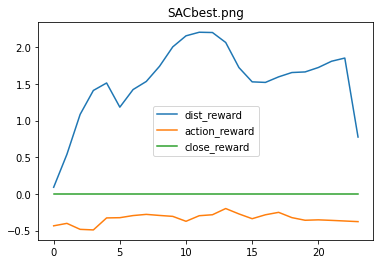

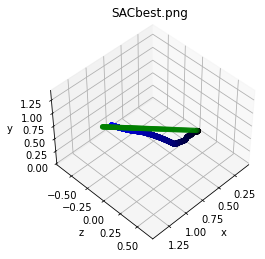

28.936578845651265

In [18]:
img_name =algo+ "best.png"
model_test = SAC.load(network_folder+algofoler+'models/best')
evaluate_env(env_test,
             model_test,
             title=img_name,
             traj_fig_name=network_folder+algofoler+'imgs/trajs/'+img_name,
             reward_fig_name=network_folder+algofoler+'imgs/rewards/'+img_name,
             save=True)

In [21]:
ref_line = fl.debugLine()
ref_line.vertices = [
    env_test.path_start*(1.0-t)+env_test.goal_pos*t for t in np.arange(0.0,1.0,1.0/100)
]
fl.VTKWriter.writeLines([ref_line], env_test.simulator.fluid_solver.dataPath["trajectory"]+"/trajectory_ideal.vtk")

True

In [20]:
env_test.simulator.fluid_solver.dataPath

{'fluid': '/home/liuwj/codes/pytorch_fish/scripts/gym-fish/gym_fish/envs/data/vis_data/Fluid/',
 'objects': '/home/liuwj/codes/pytorch_fish/scripts/gym-fish/gym_fish/envs/data/vis_data/Objects/',
 'trajectory': '/home/liuwj/codes/pytorch_fish/scripts/gym-fish/gym_fish/envs/data/vis_data/Trajectory/'}